In [32]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys

# Global Variables

In [33]:
data_path = '../BM-Experiment-raspi-configs/'
devices = ['Pixel3-W', 'GalaxyJ7-W', 'Nexus5X-W', 'NokiaLong-W', 'NokiaRound-W']
batch_dict = json.load(open('batches.json', 'r'))
experiments = [0, 1, 10, 100, 1000]
boxplot_order = ['Accelerometer', 'Ambient Light', 'Baseline', 
             'Camera Low Frequency', 'Camera Medium Frequency', 'Camera High Frequency', 
             'Cpu Low Frequency', 'Cpu Medium Frequency', 'Cpu High Frequency', 
             'Display', 
             'GPS Low Frequency', 'GPS Medium Frequency', 'GPS High Frequency', 
             'Gyroscope',
             'Local Storage Low Frequency', 'Local Storage Medium Frequency', 'Local Storage High Frequency', 
             'Magnetic Field', 'Microphone', 
             'Networking Low Frequency', 'Networking Medium Frequency', 'Networking High Frequency', 
             'Room Database Low Frequency', 'Room Database Medium Frequency', 'Room Database High Frequency',
             'Speaker', 'Gravity', 
             'Cpu INTERVAL', 'Camera INTERVAL', 'Display INTERVAL']

In [34]:
batch_dict['batch1']['e-www-cameratest']

'Camera High Frequency'

# CSV Retrieval

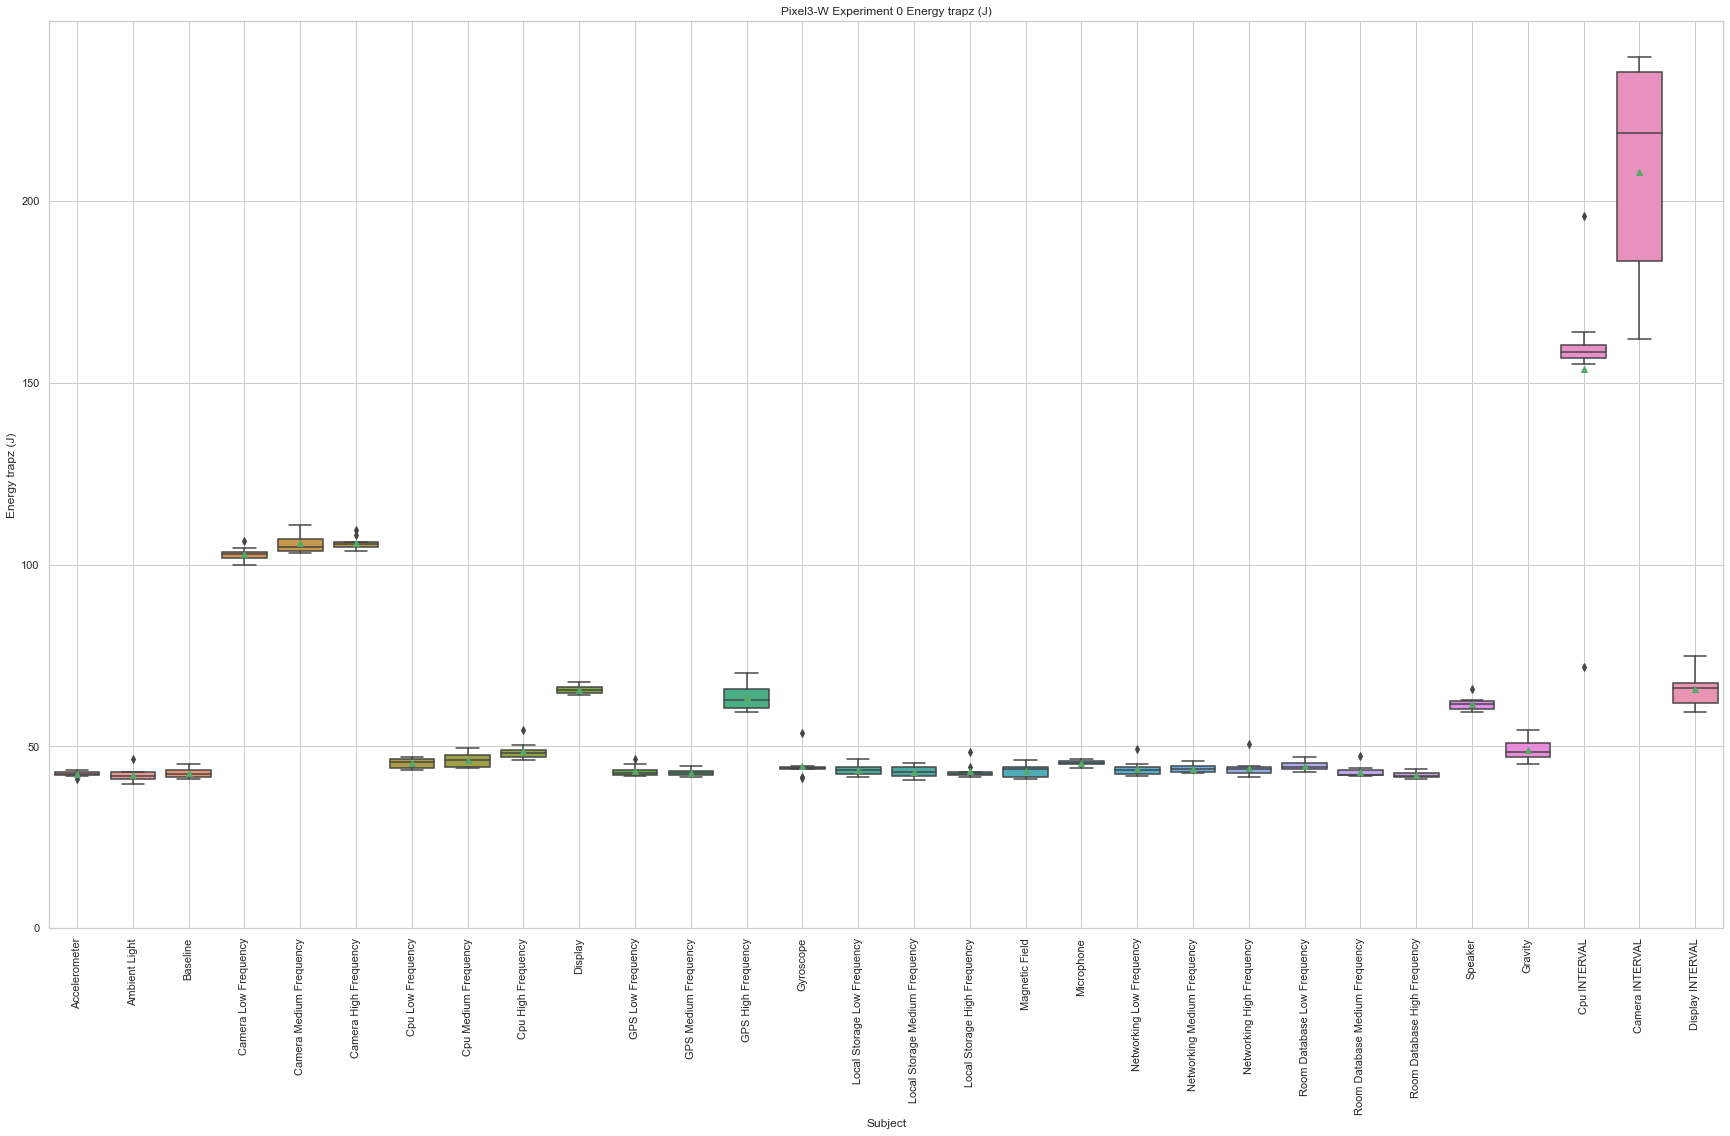

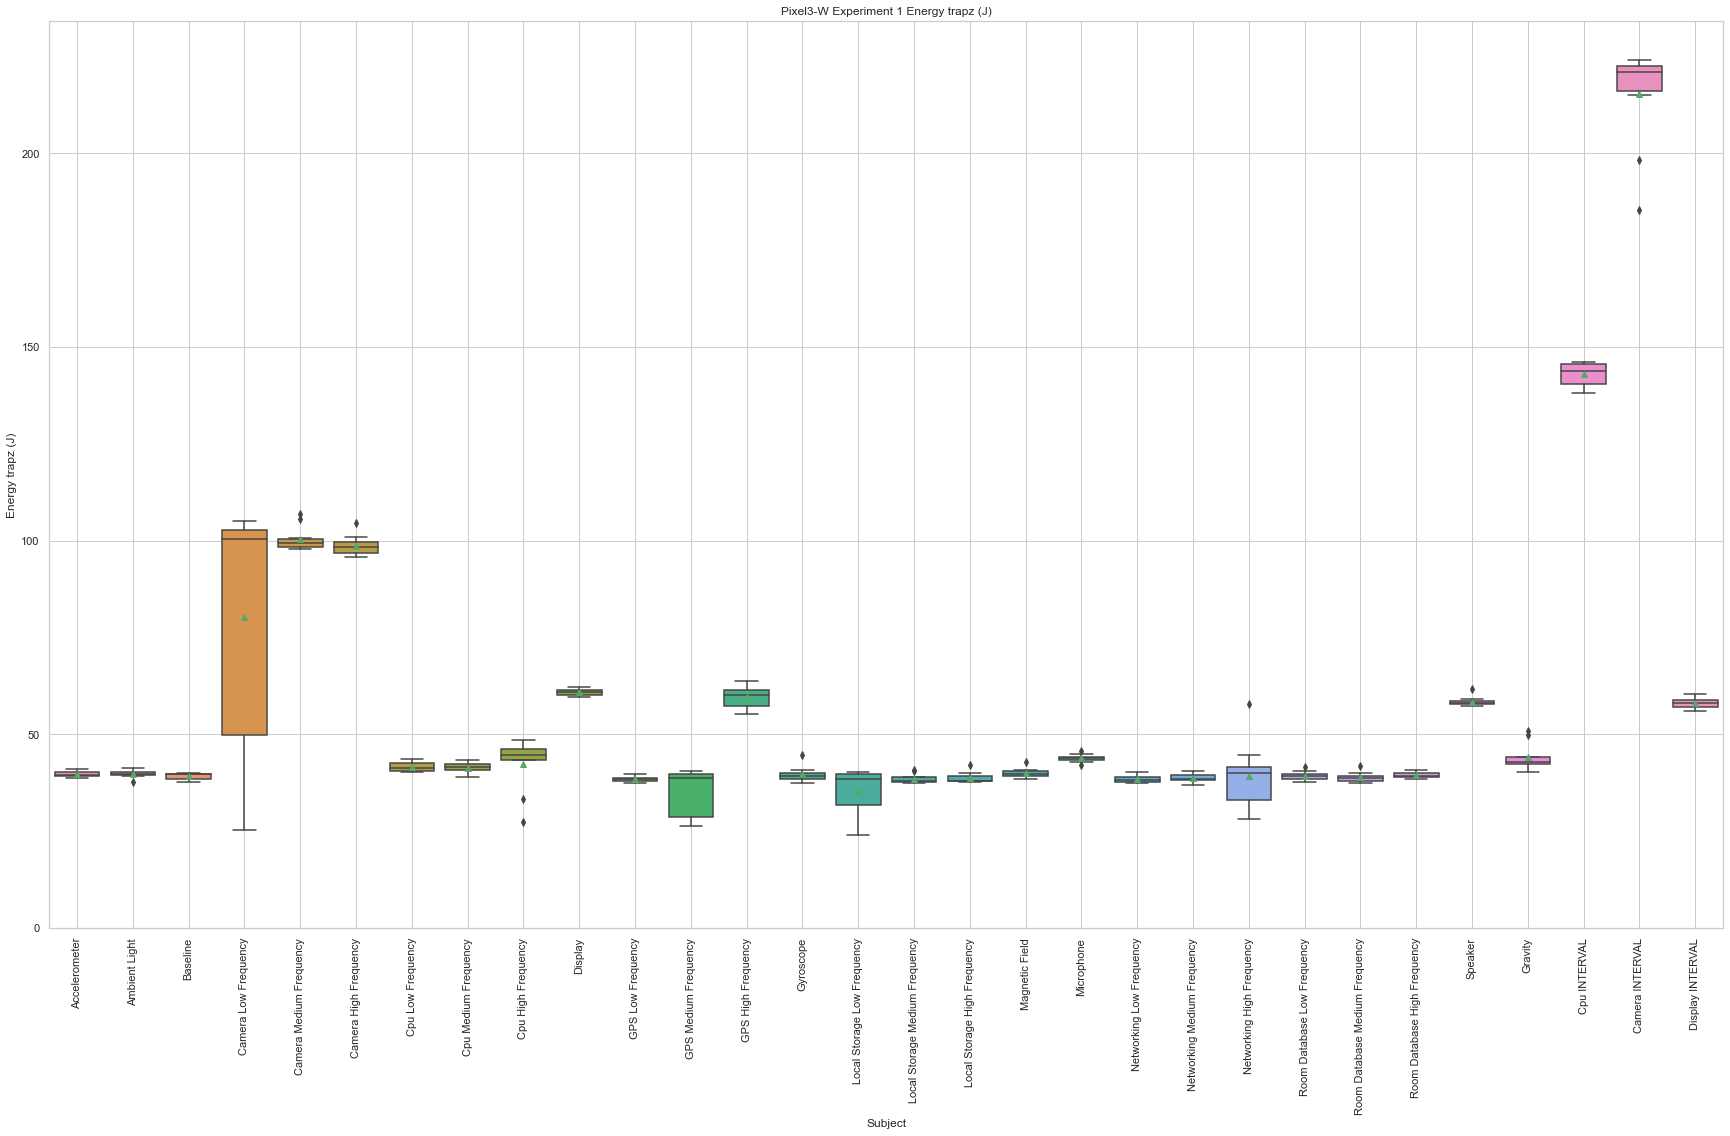

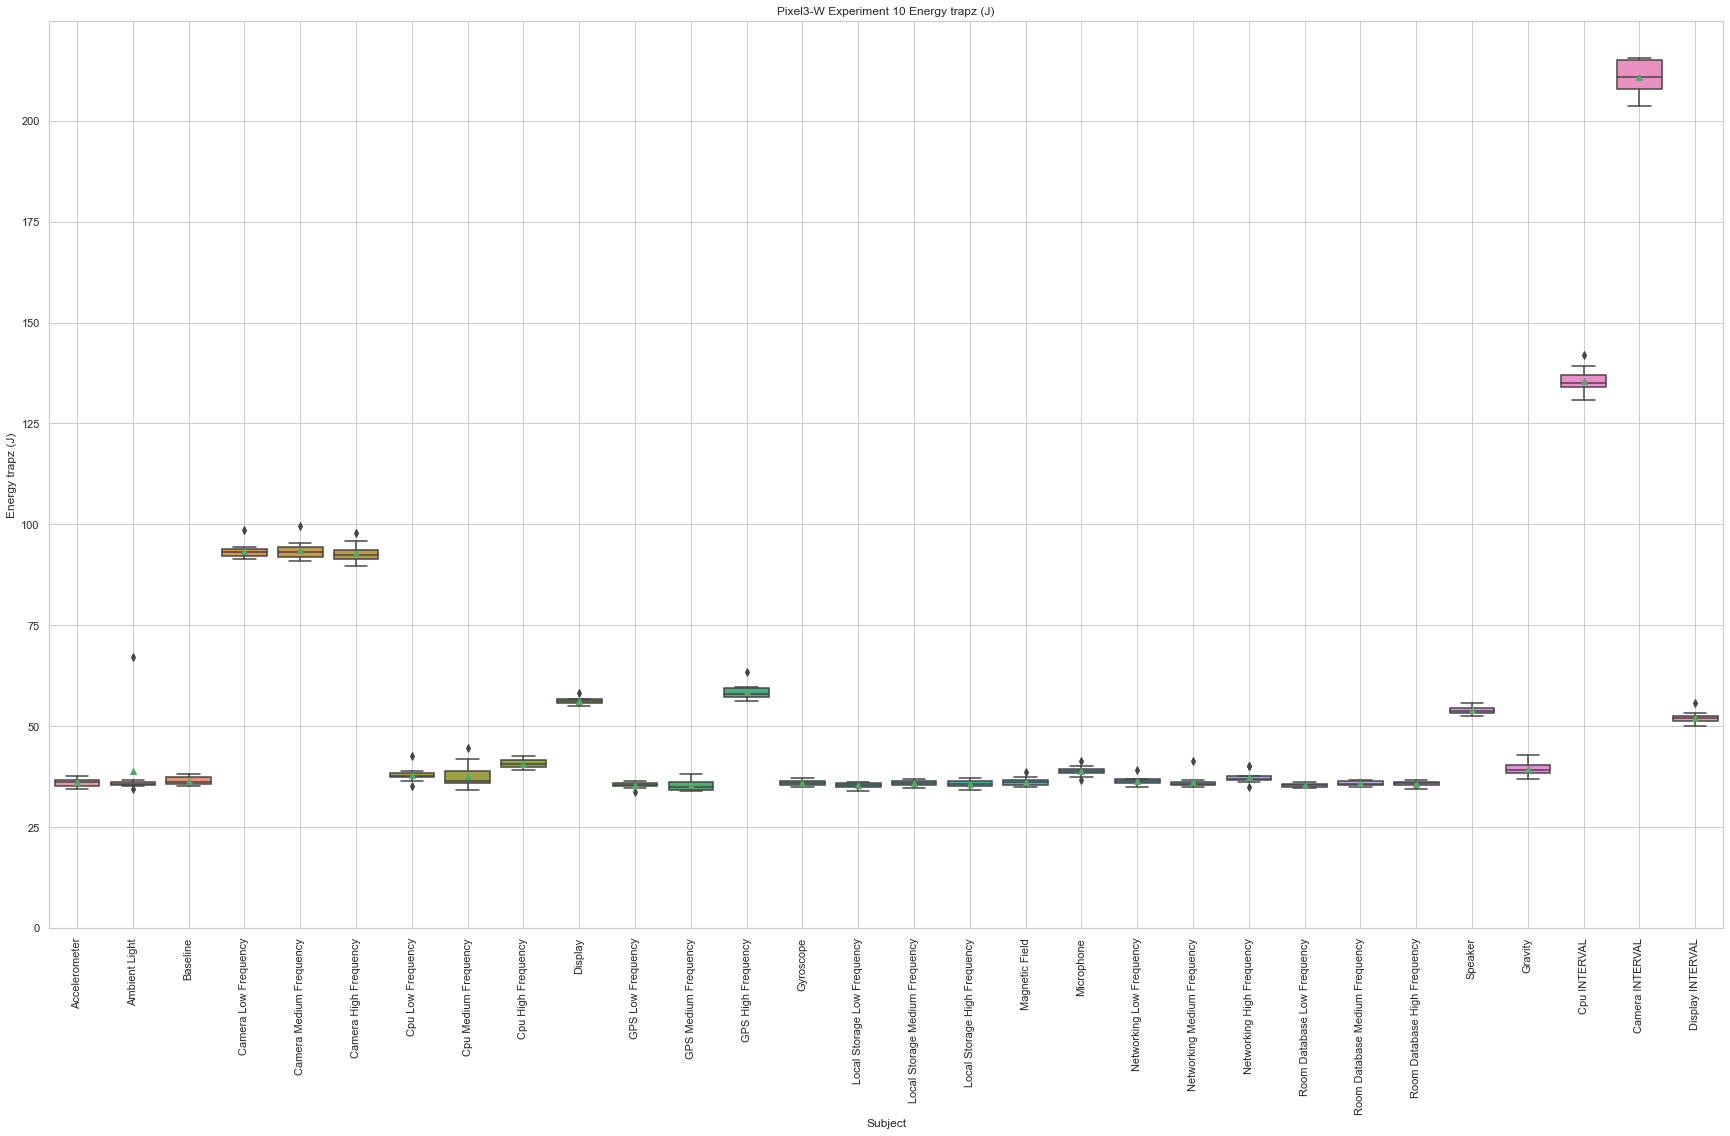

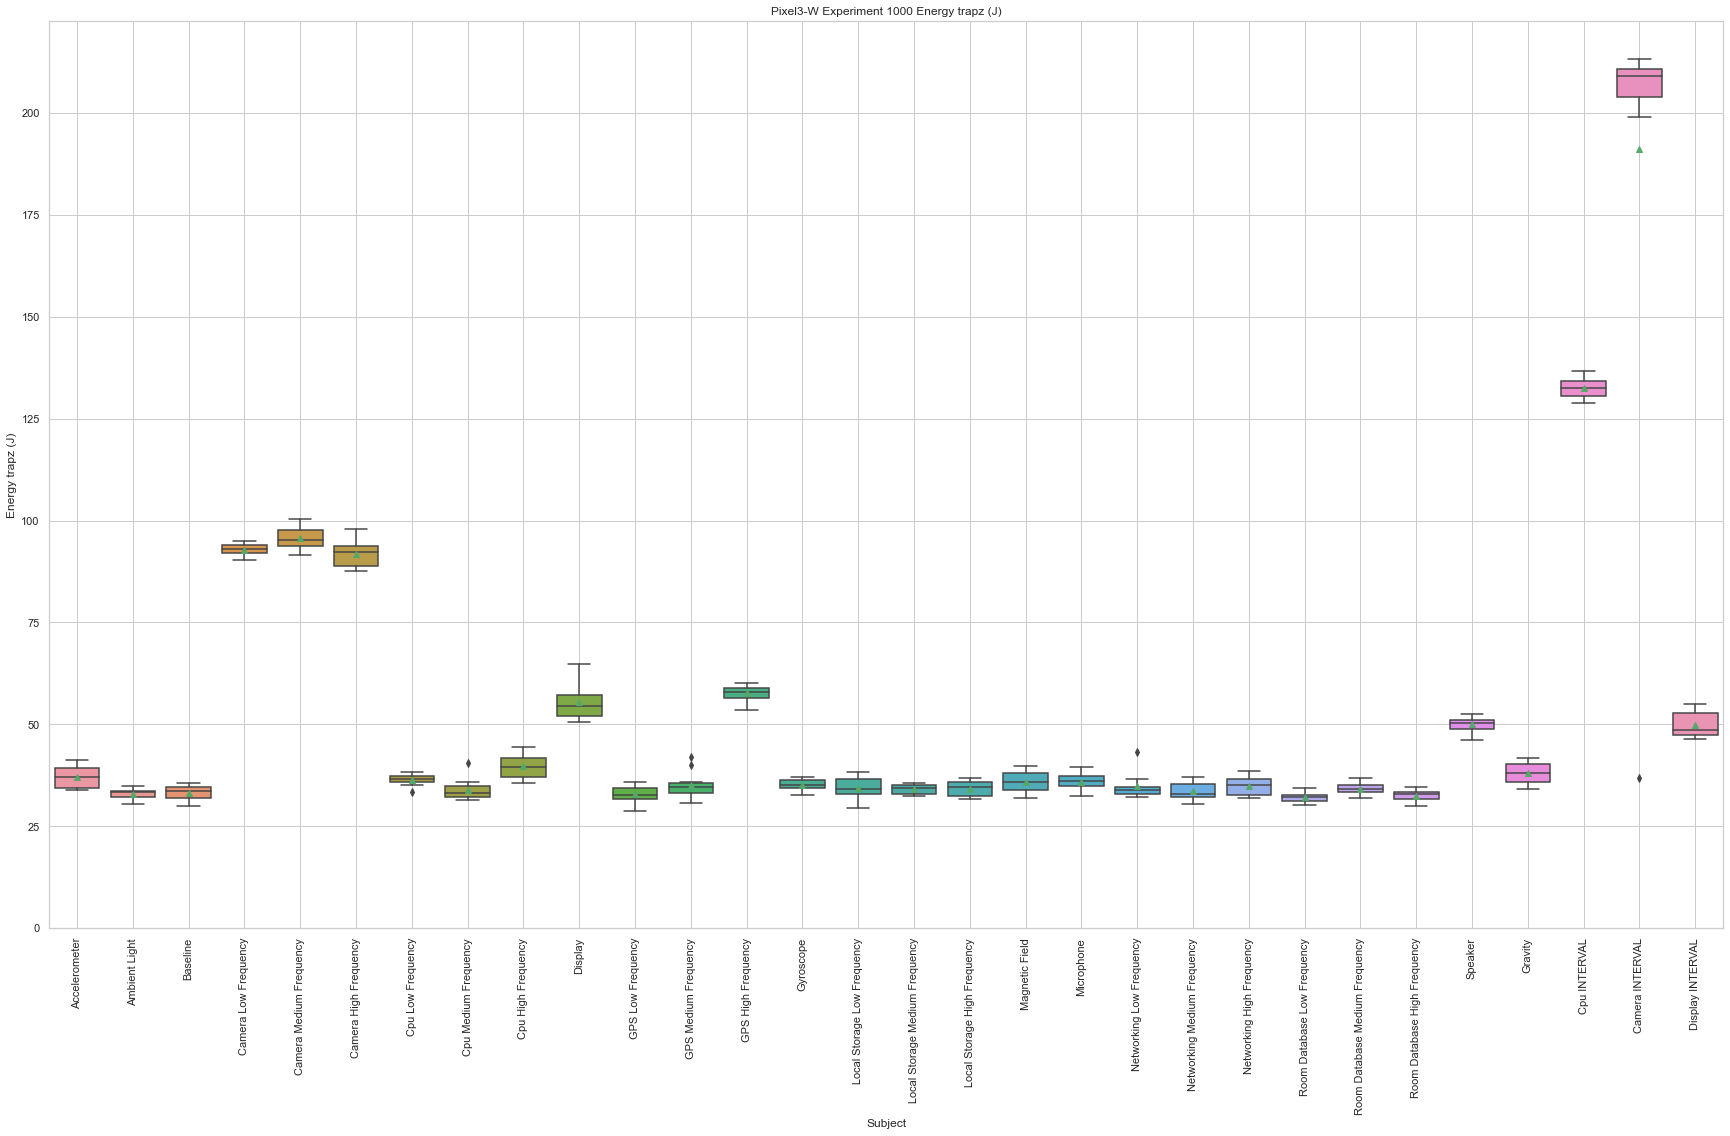

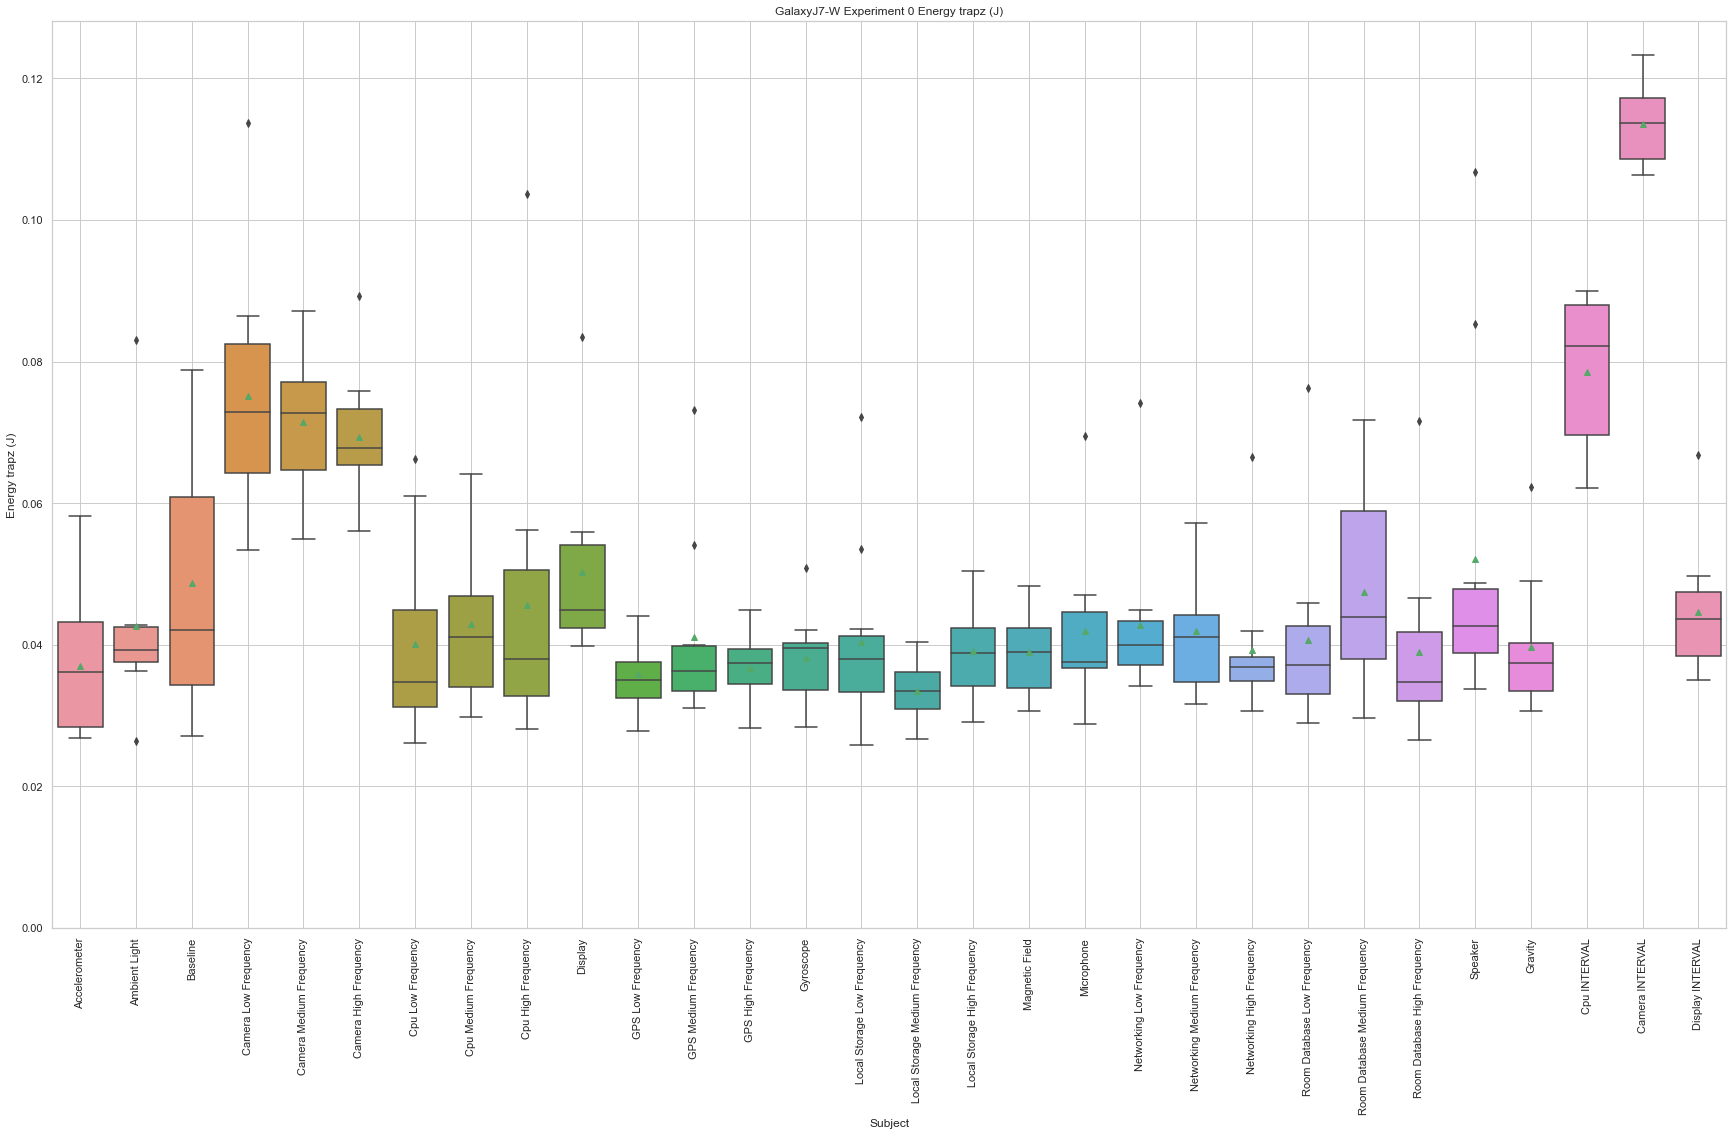

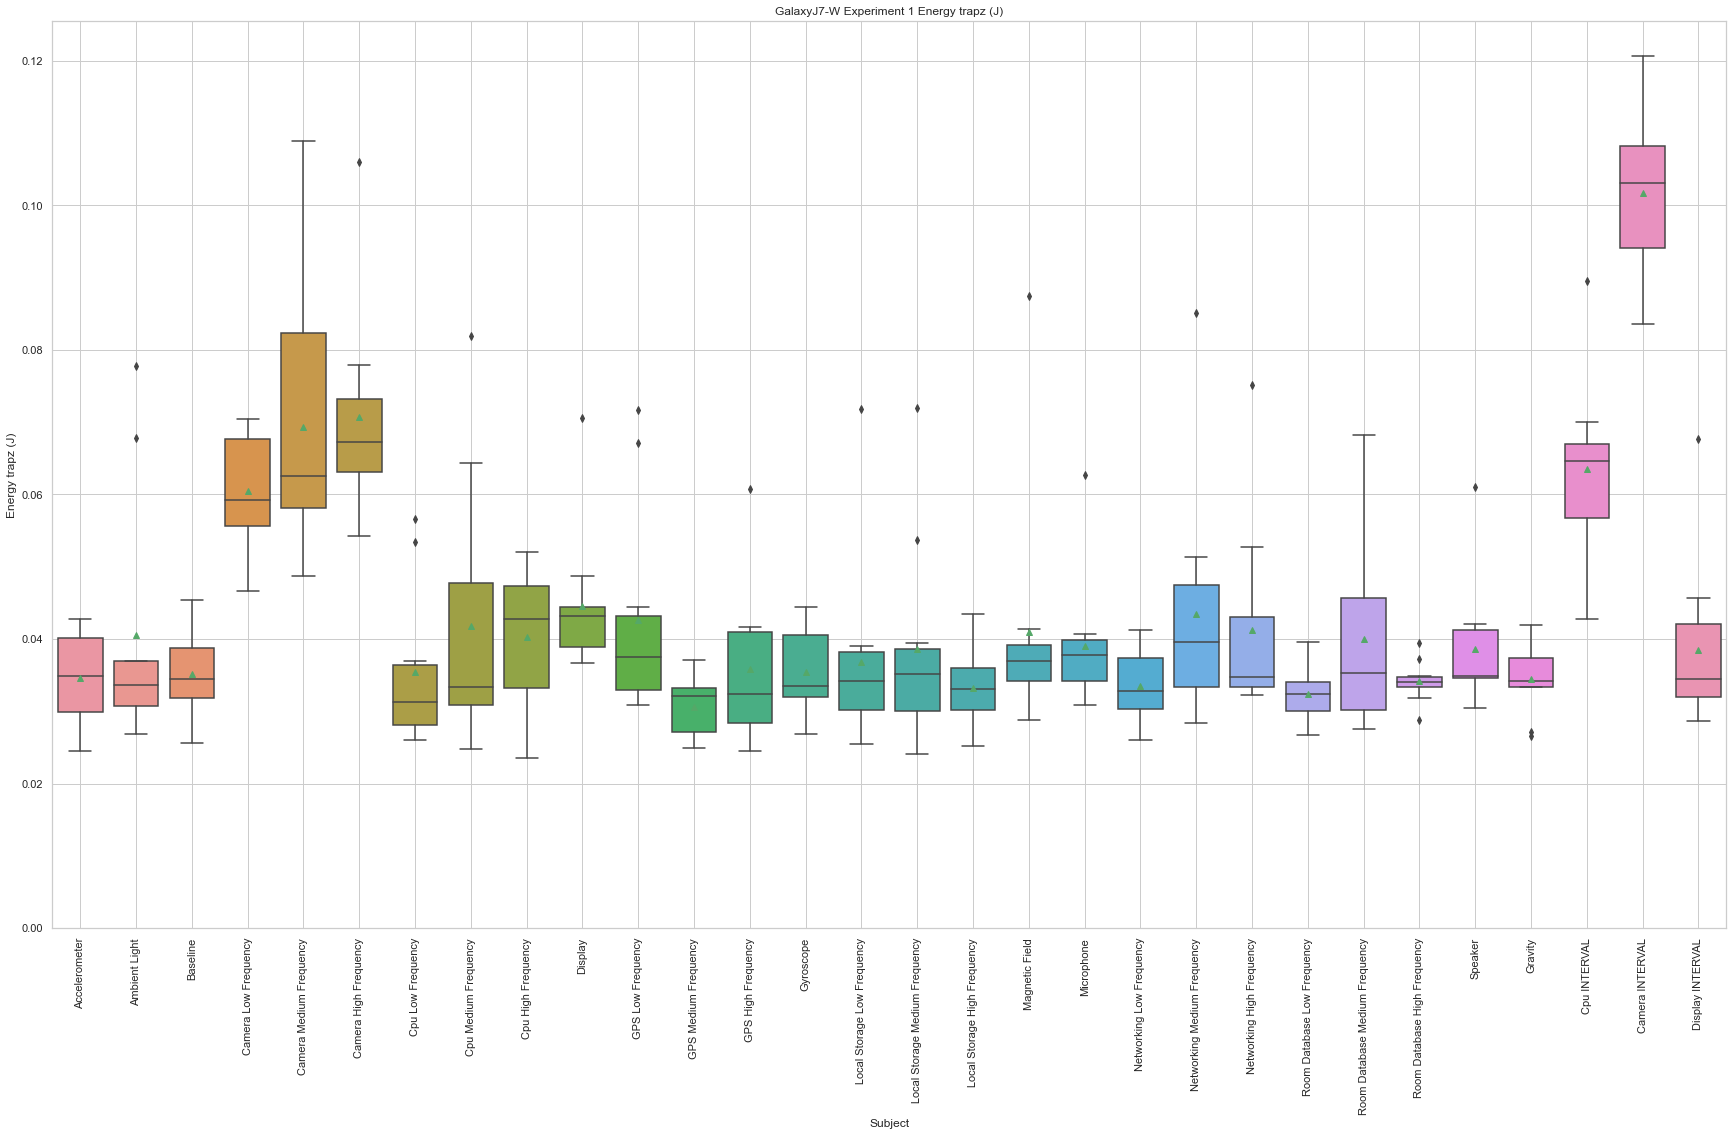

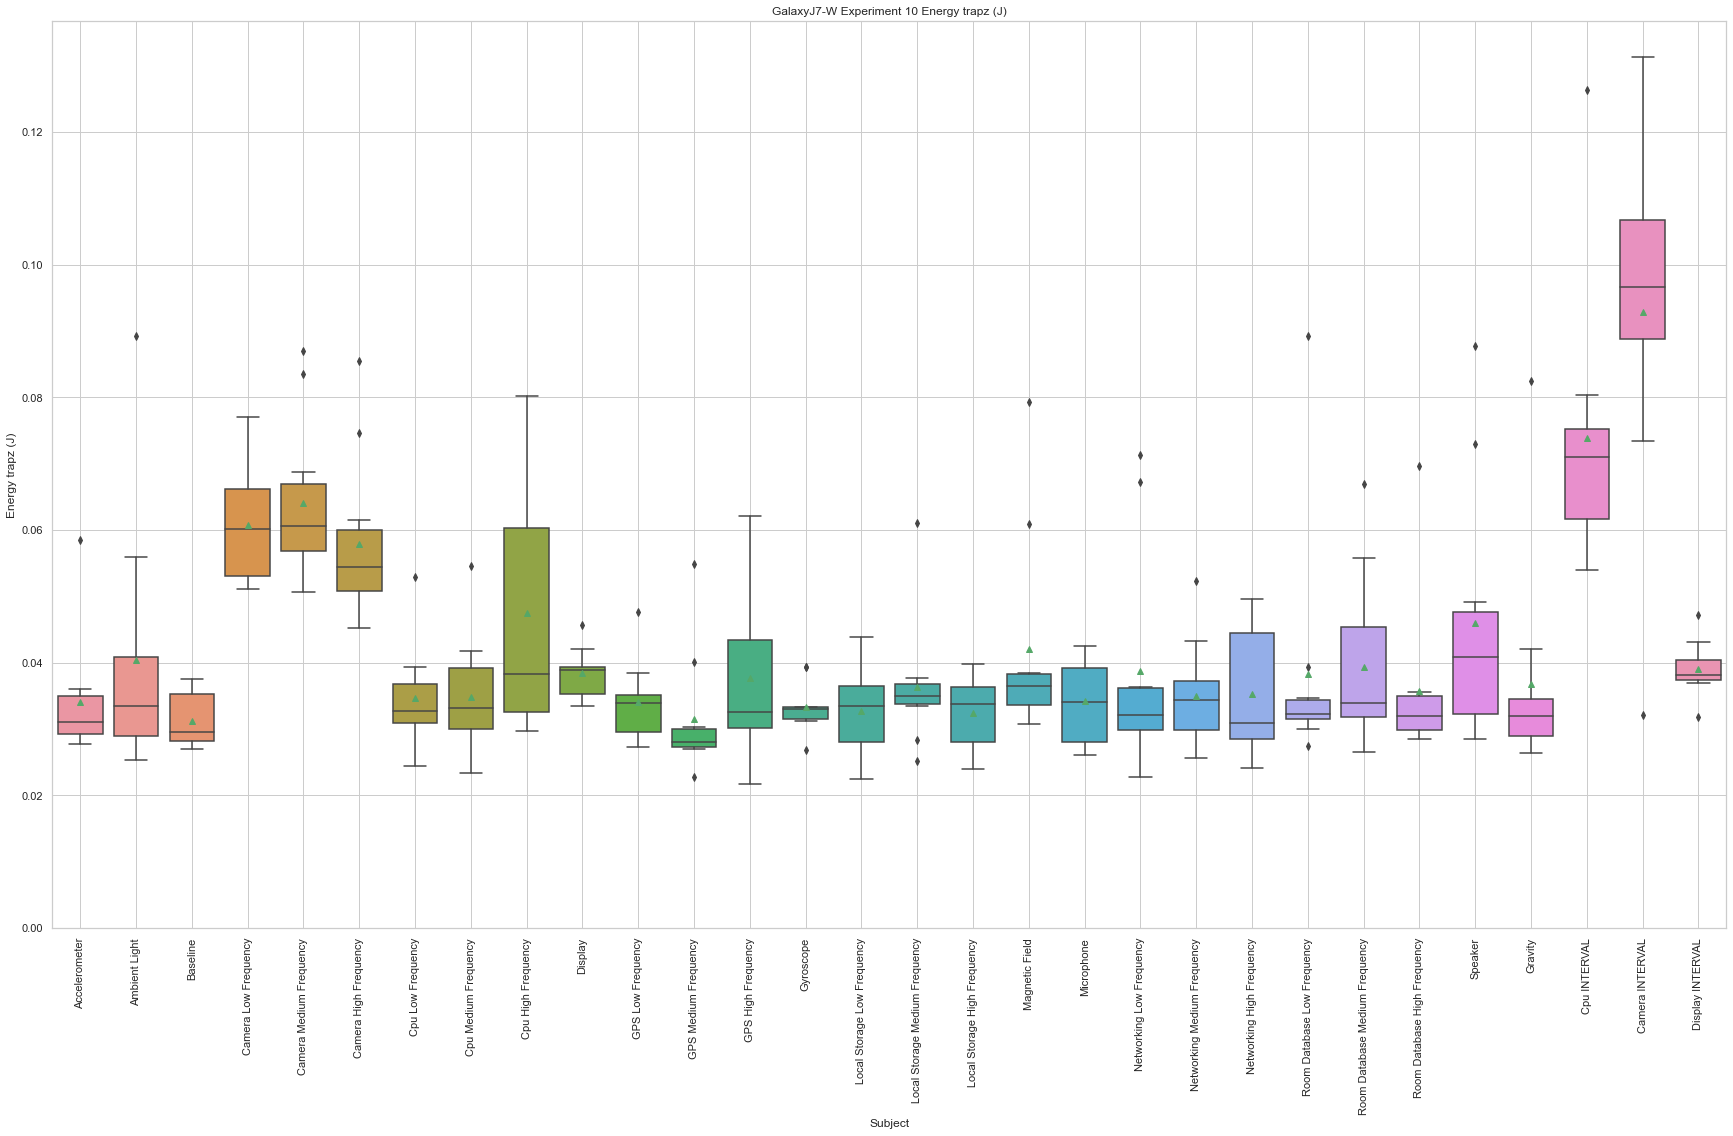

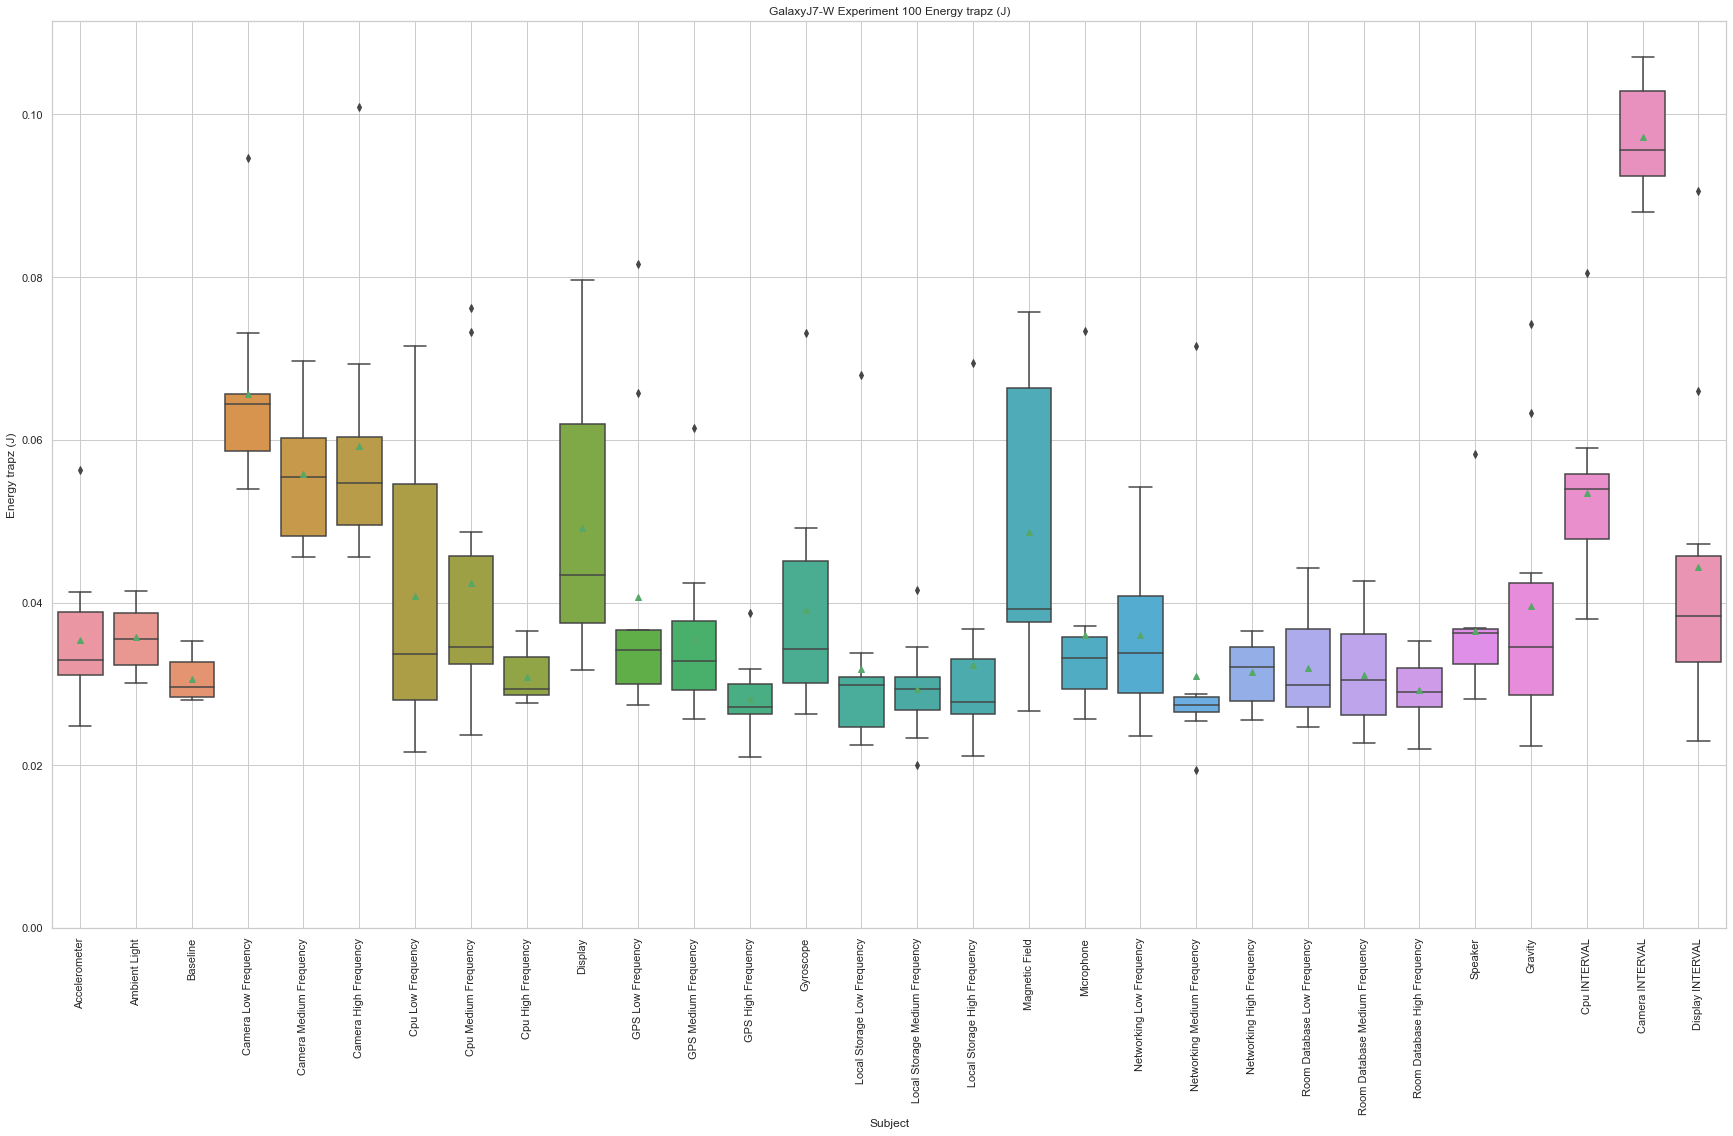

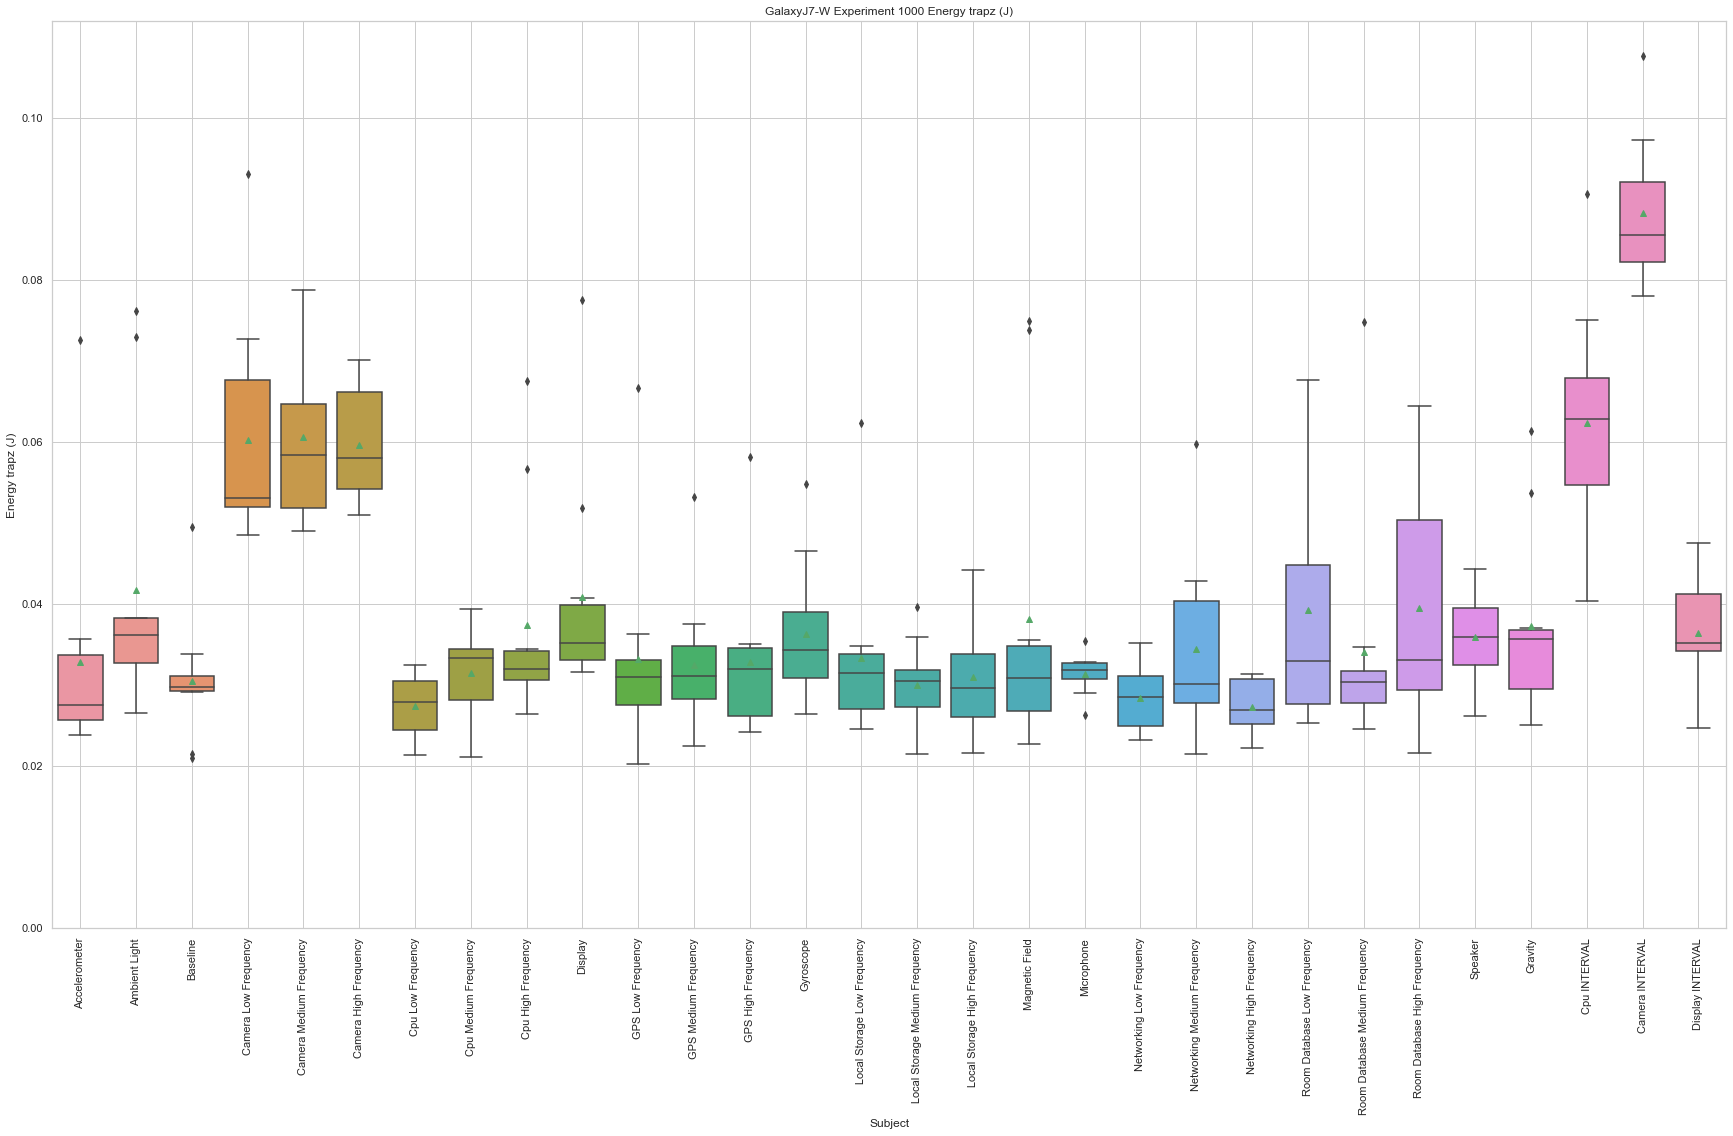

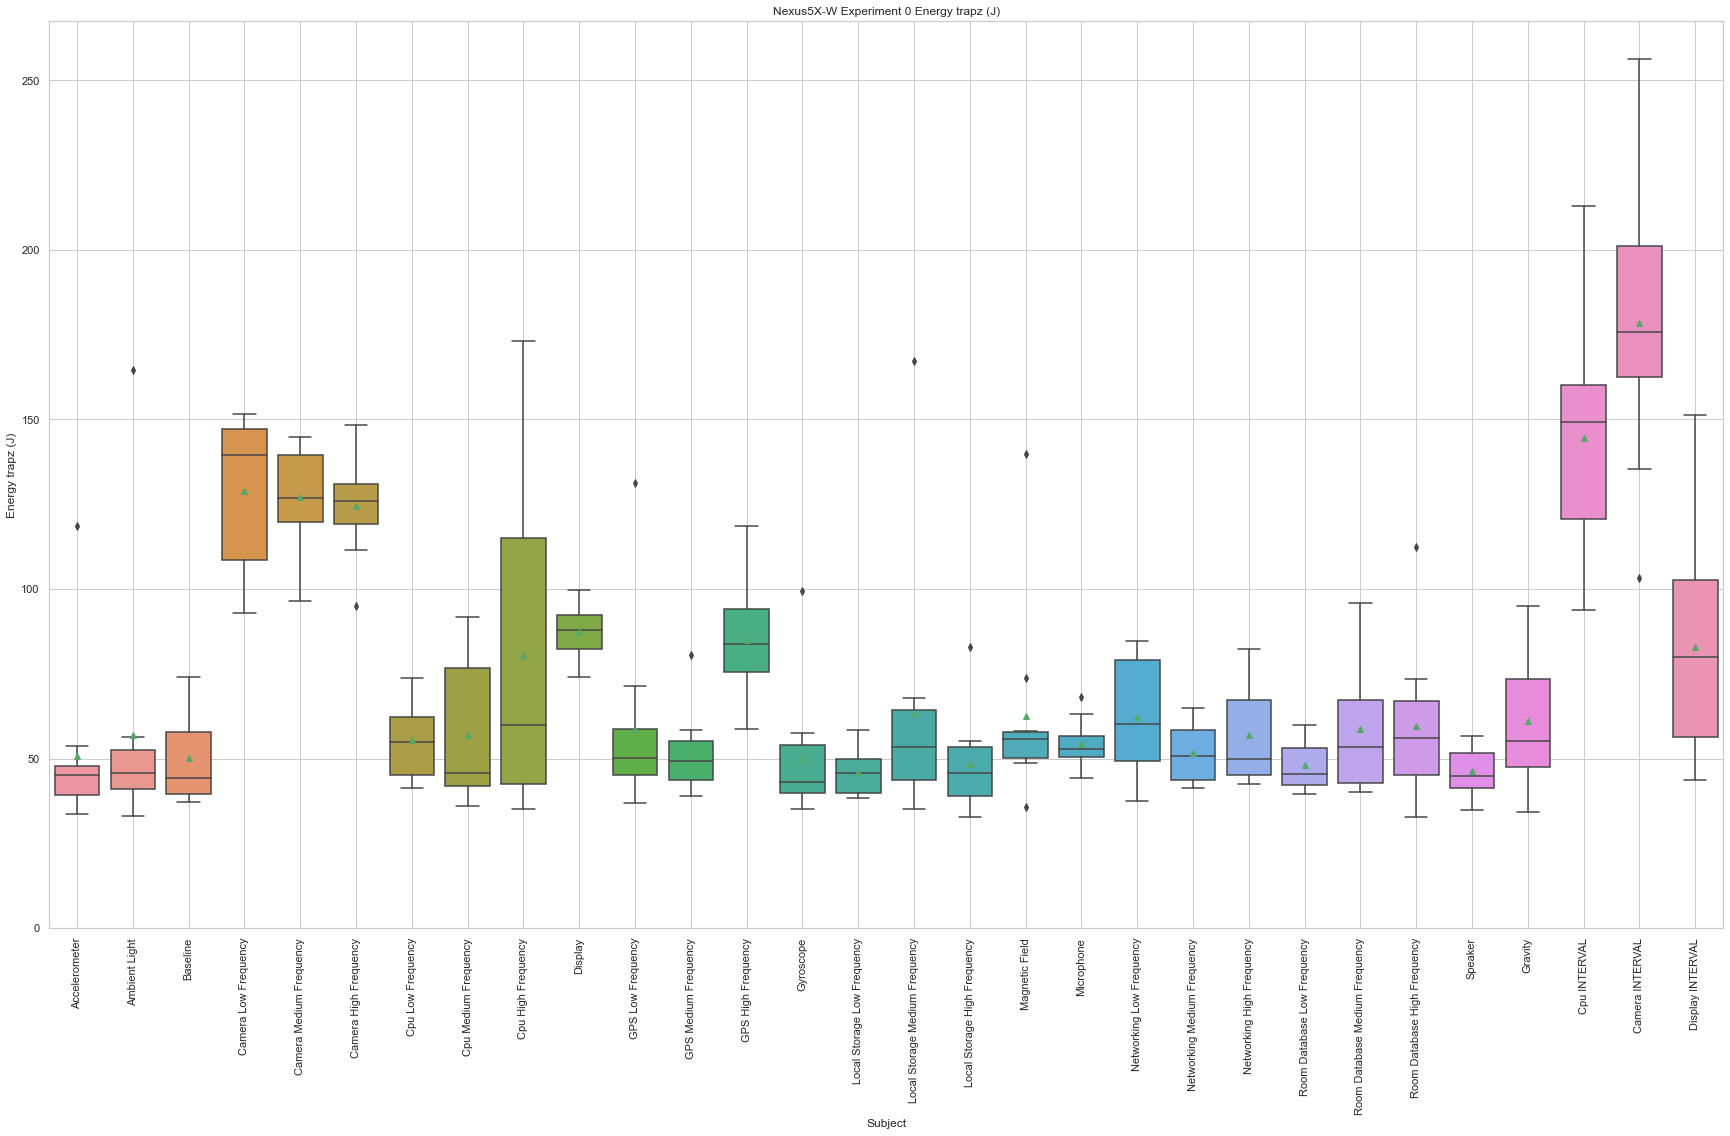

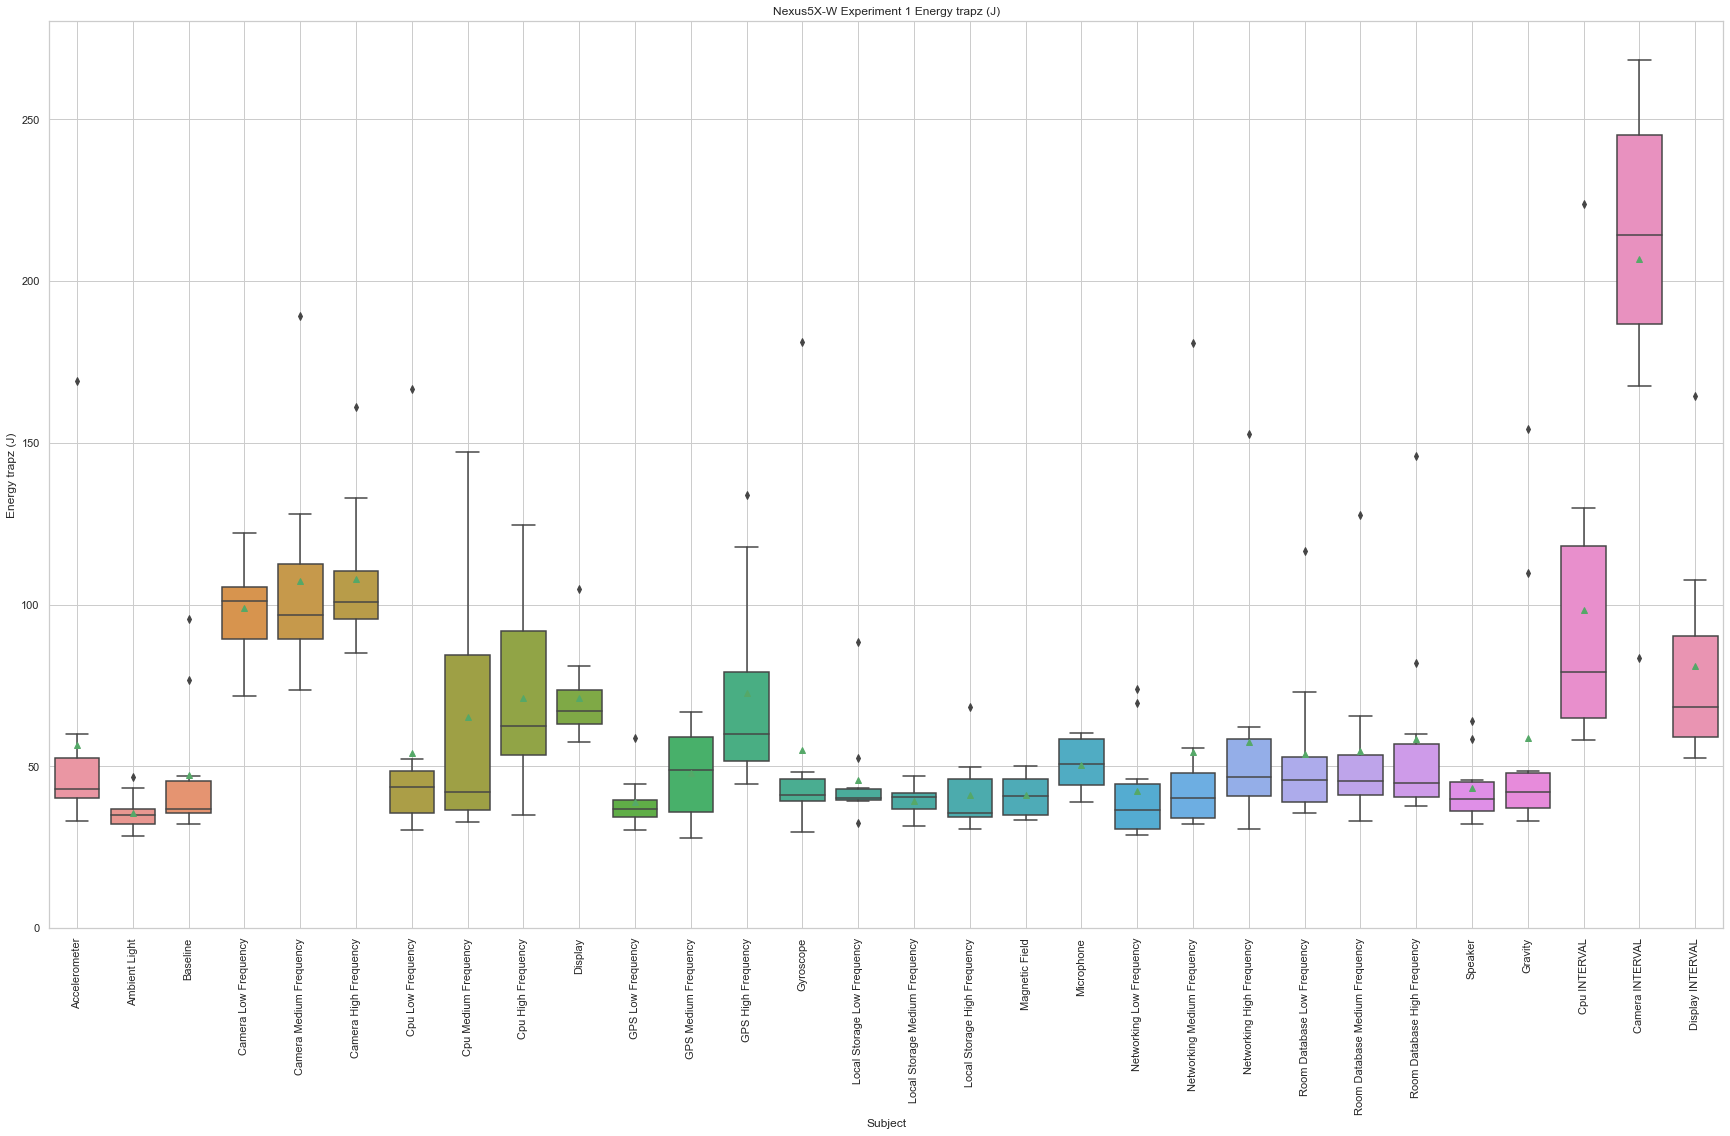

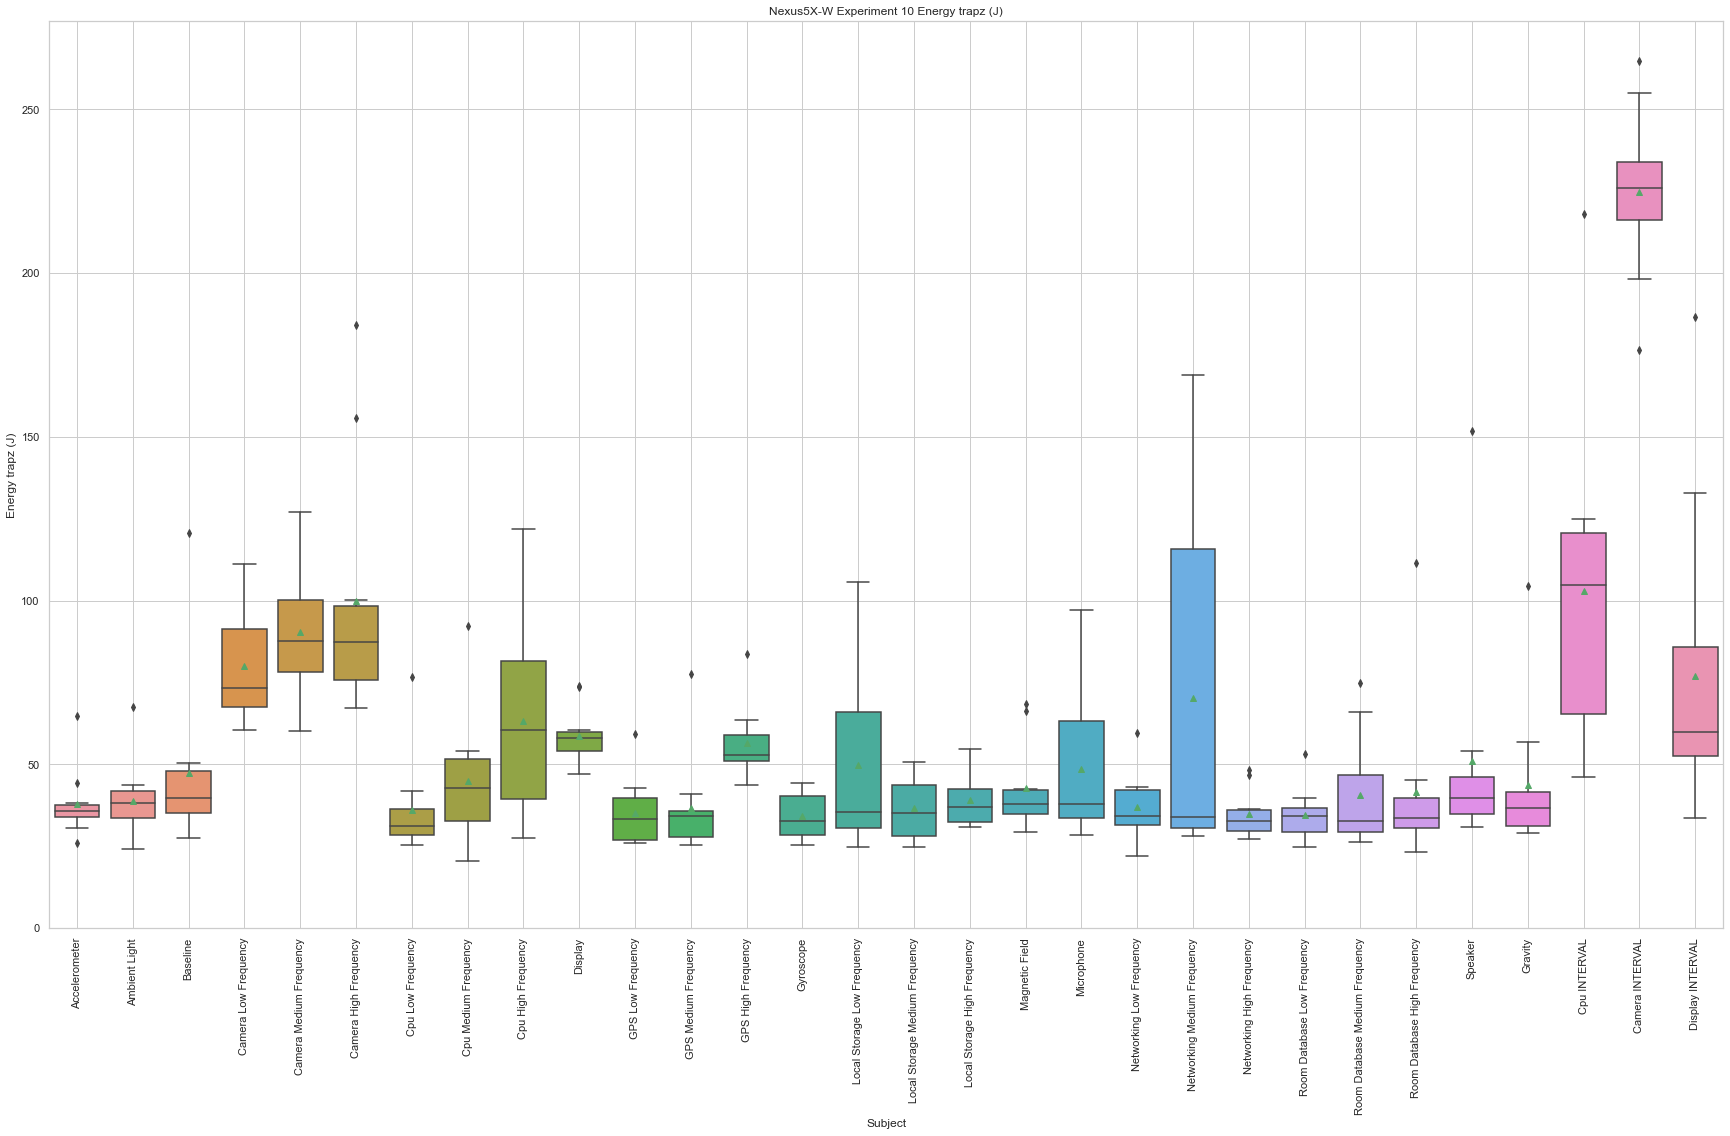

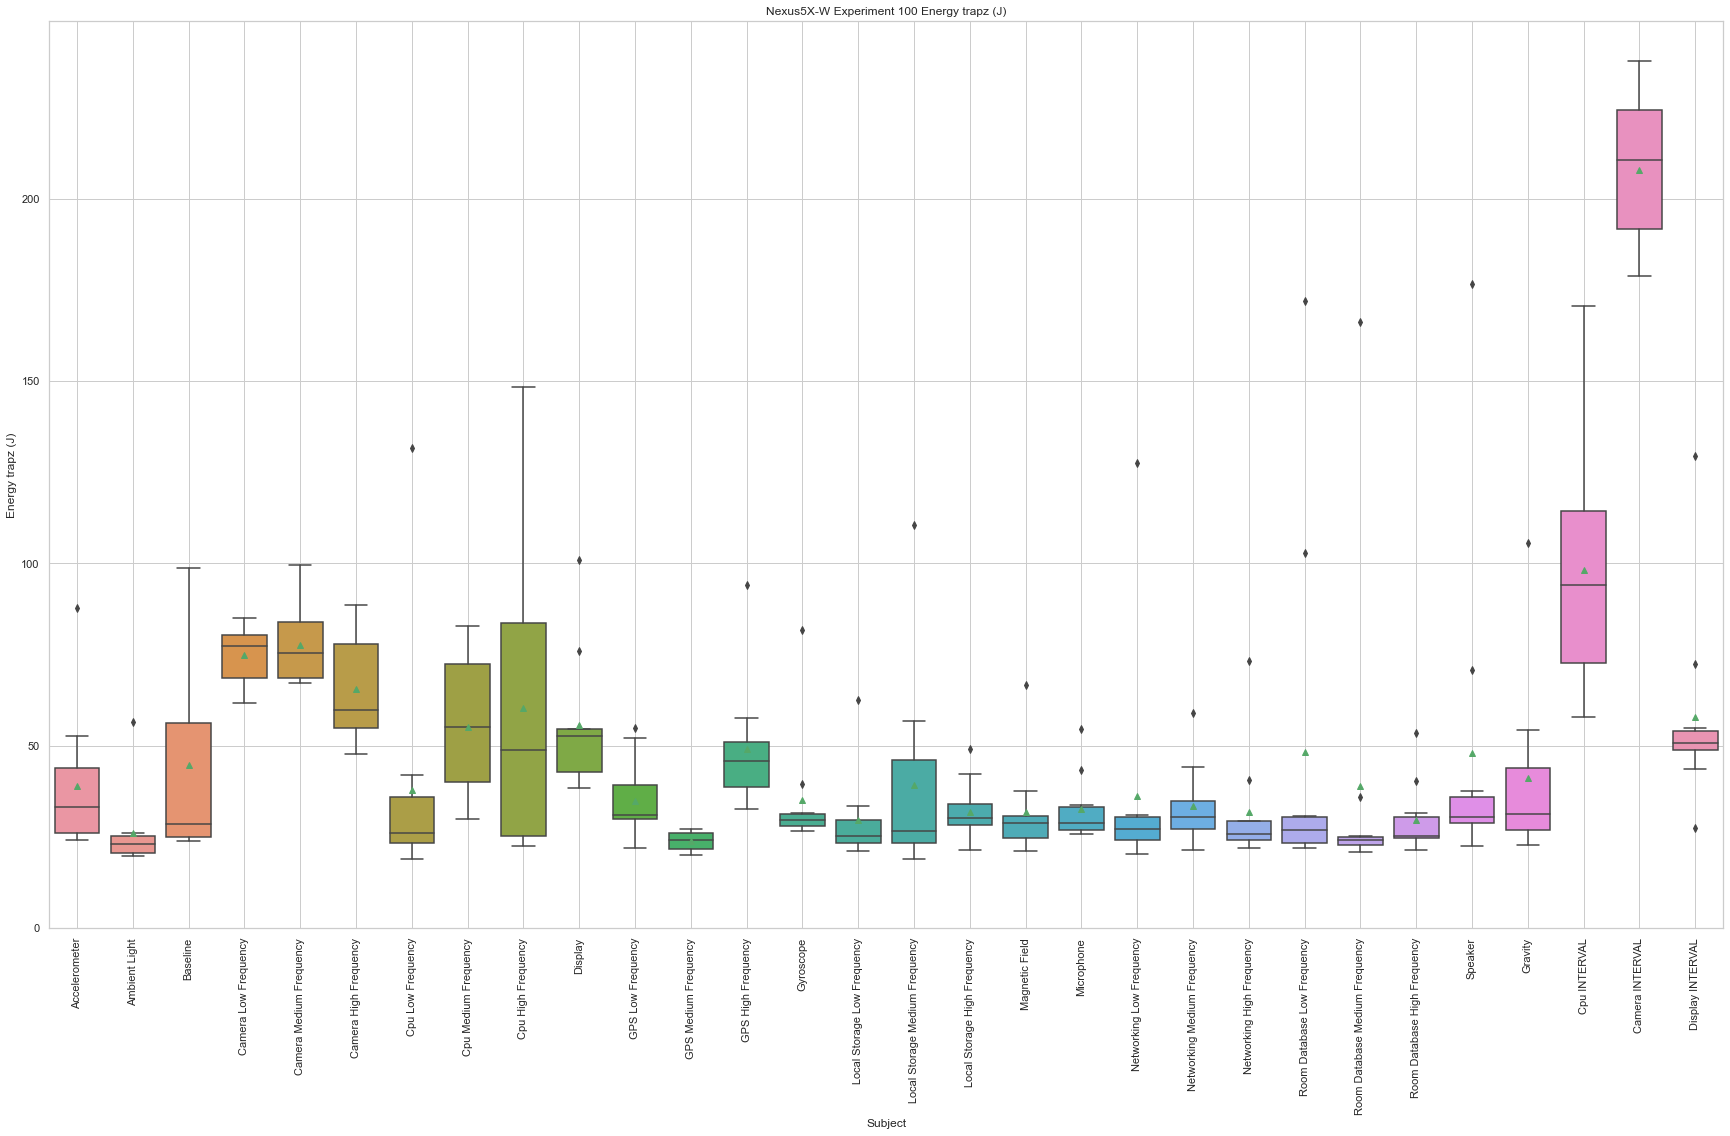

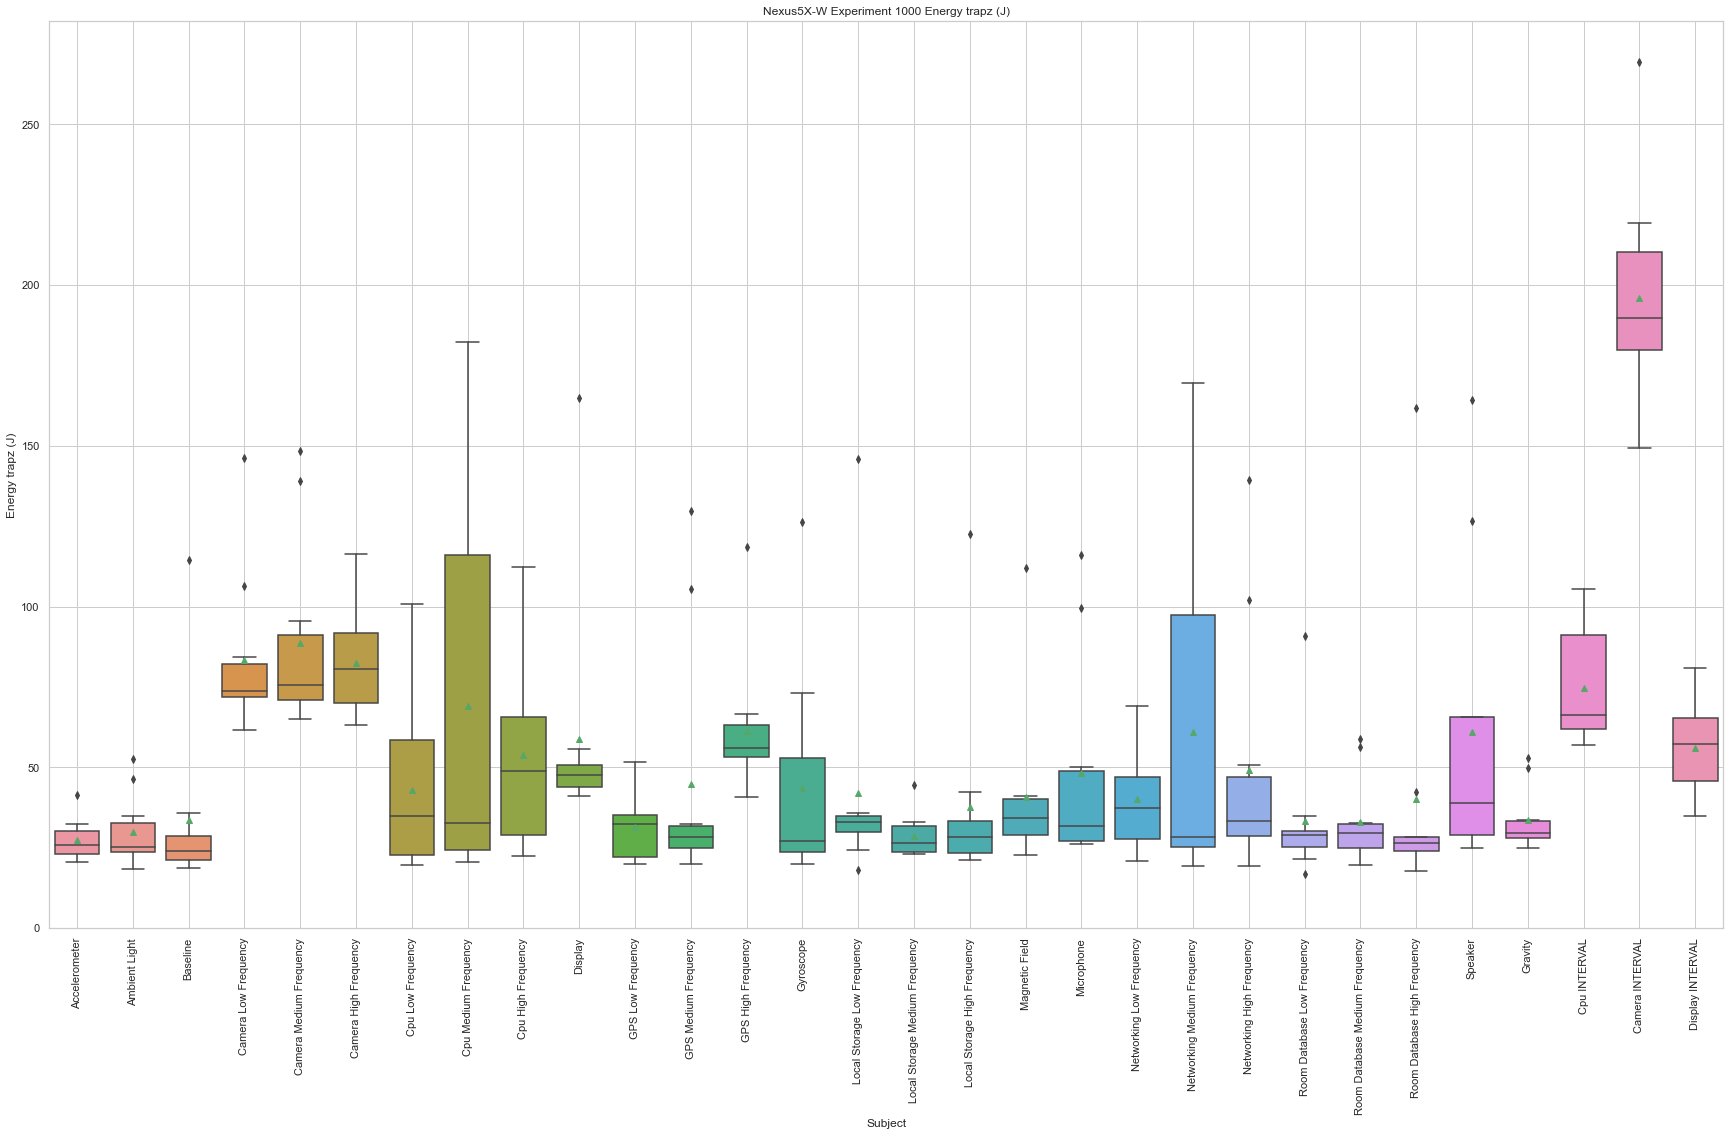

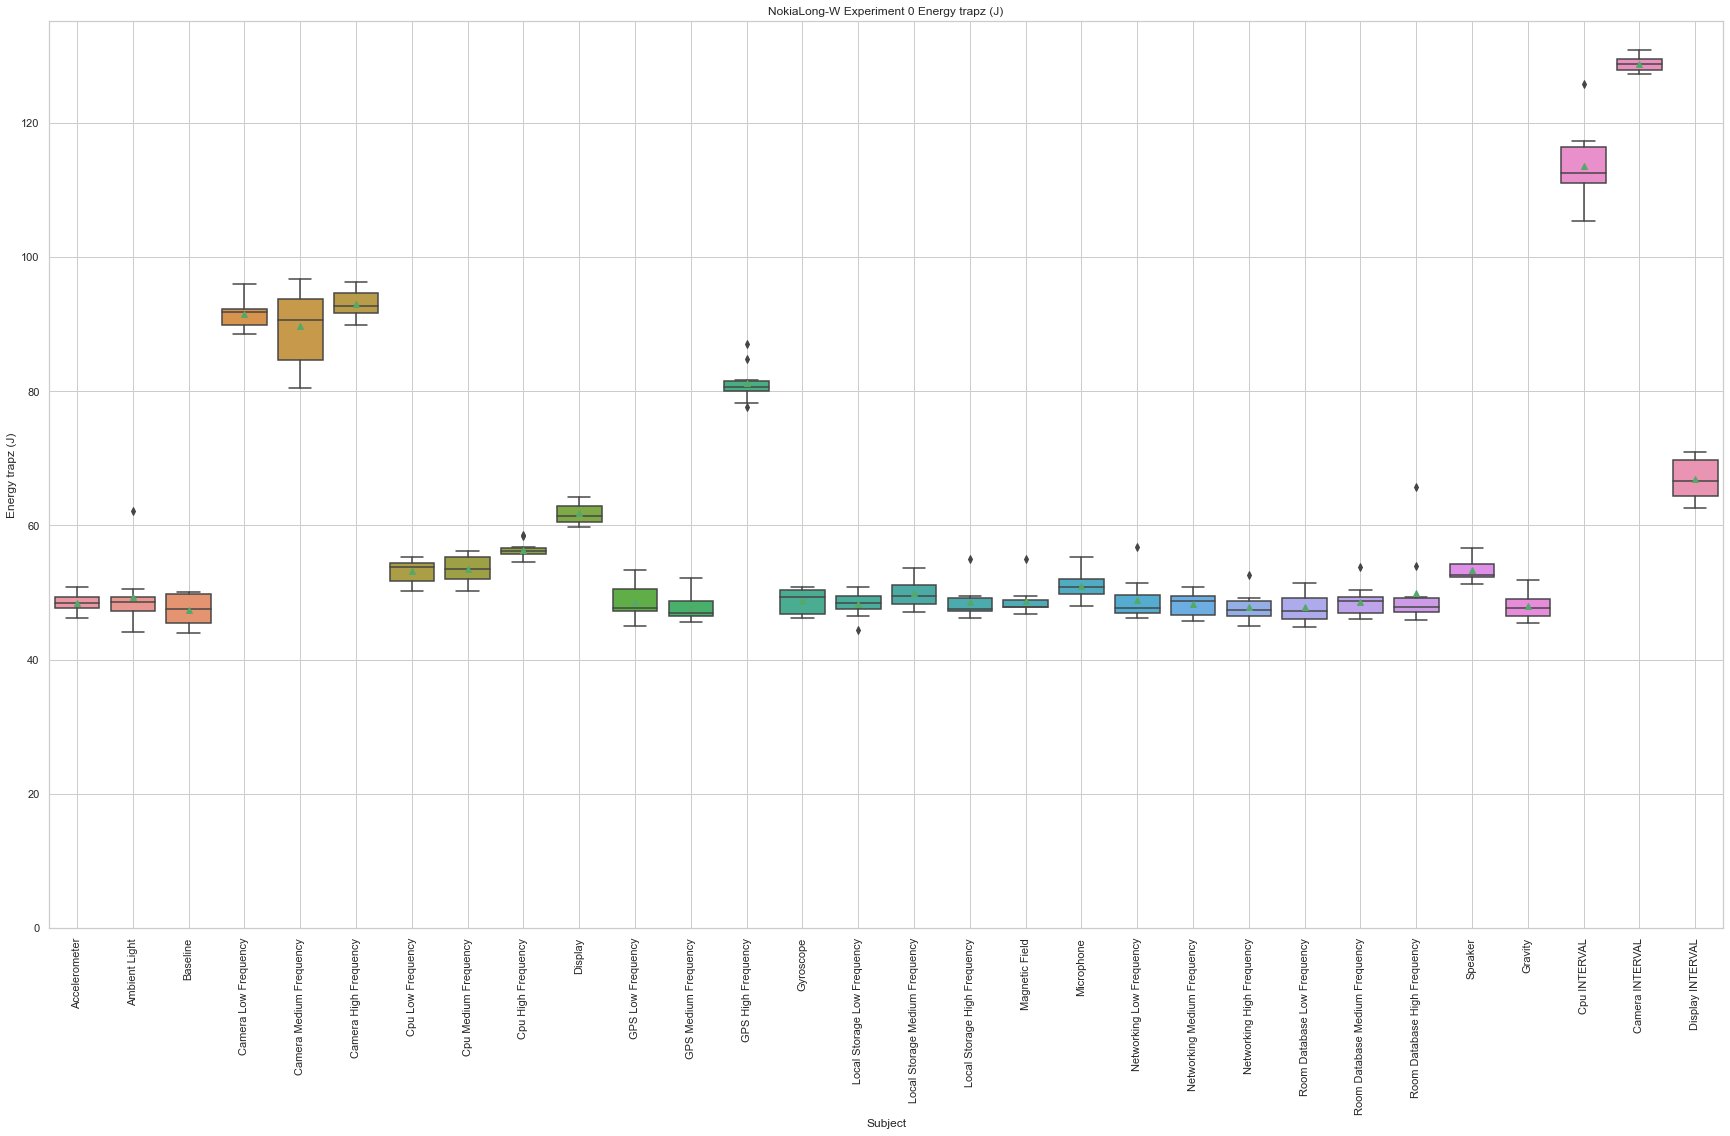

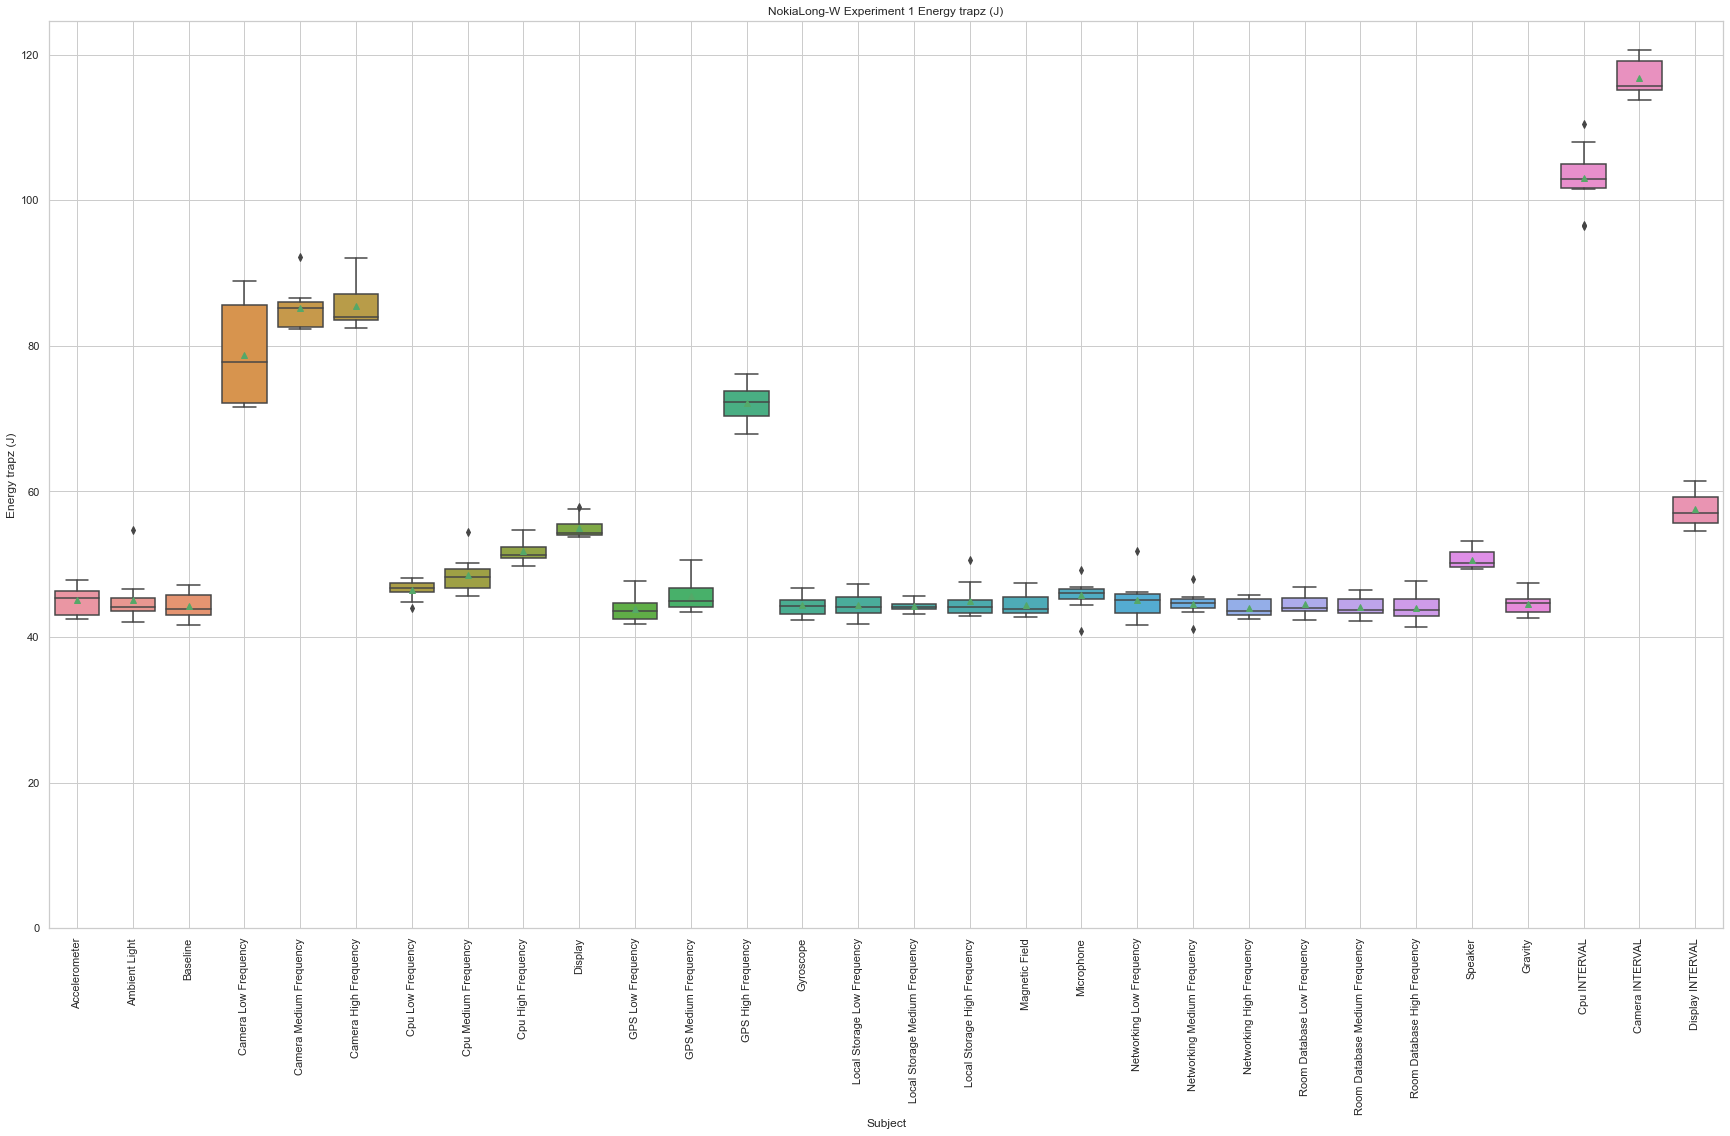

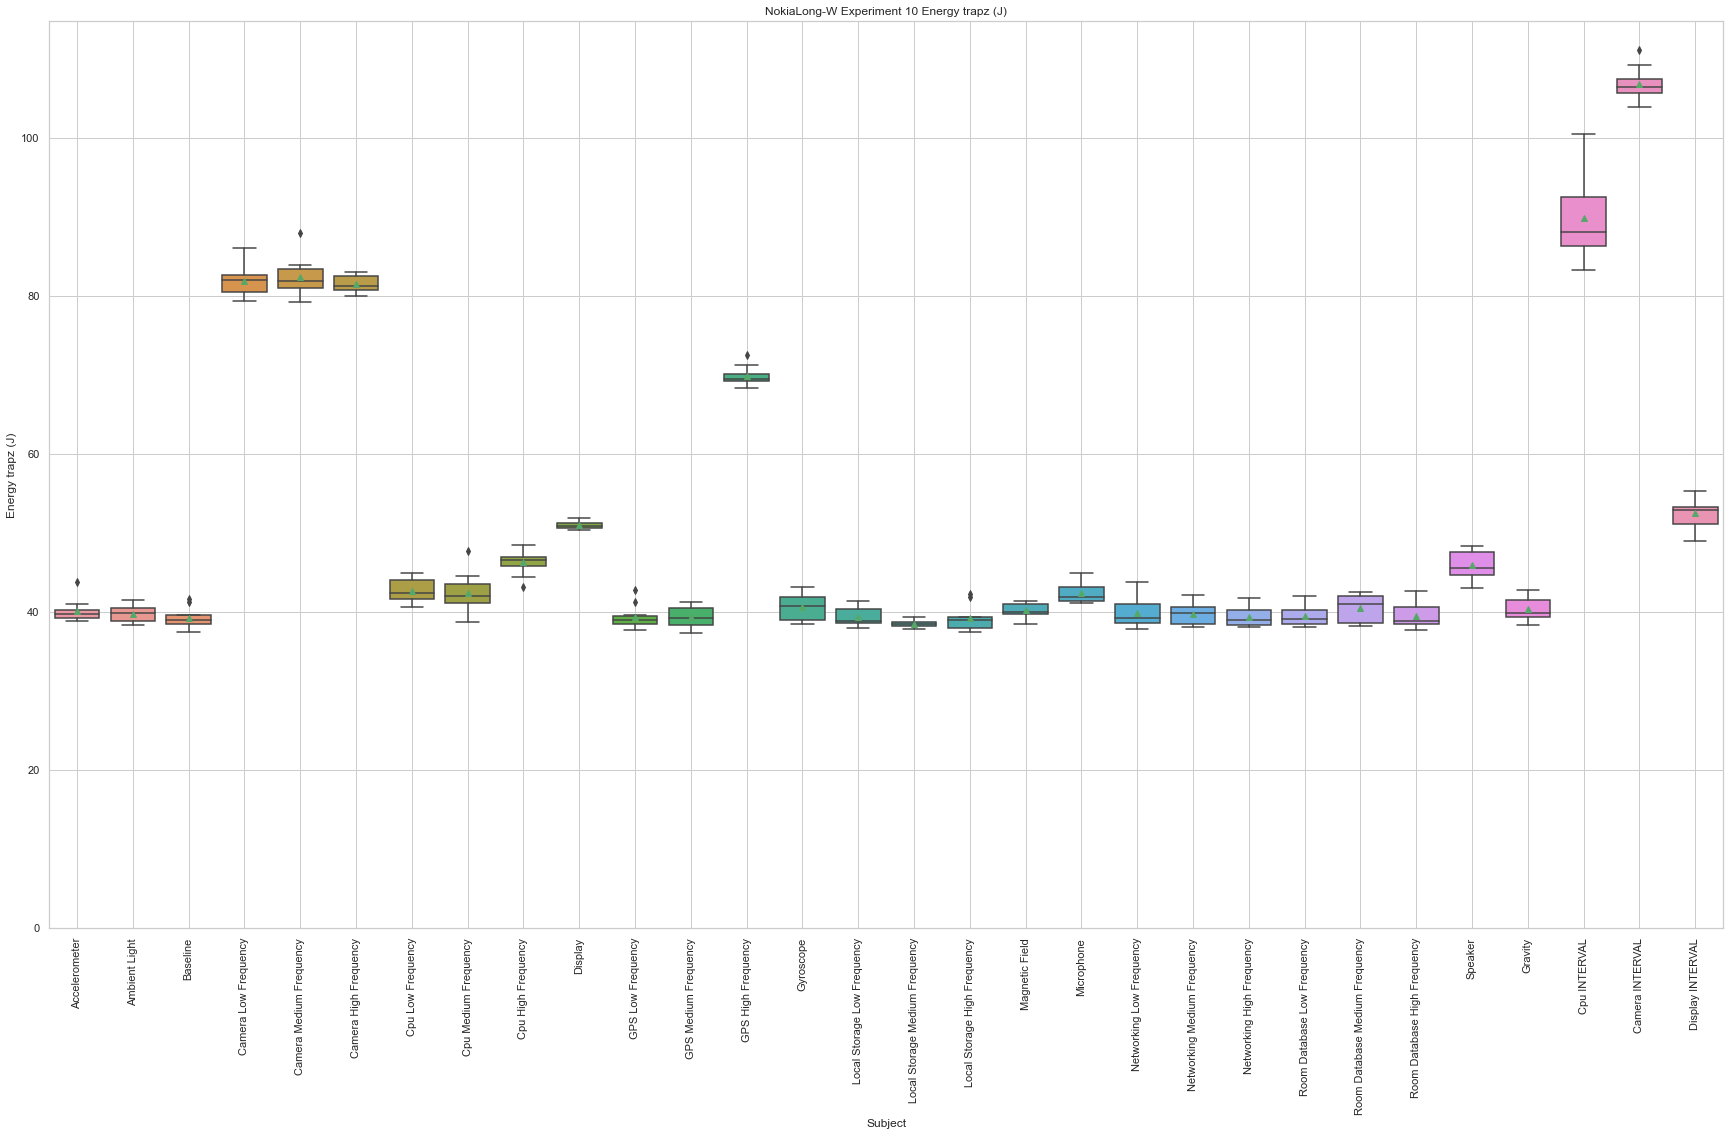

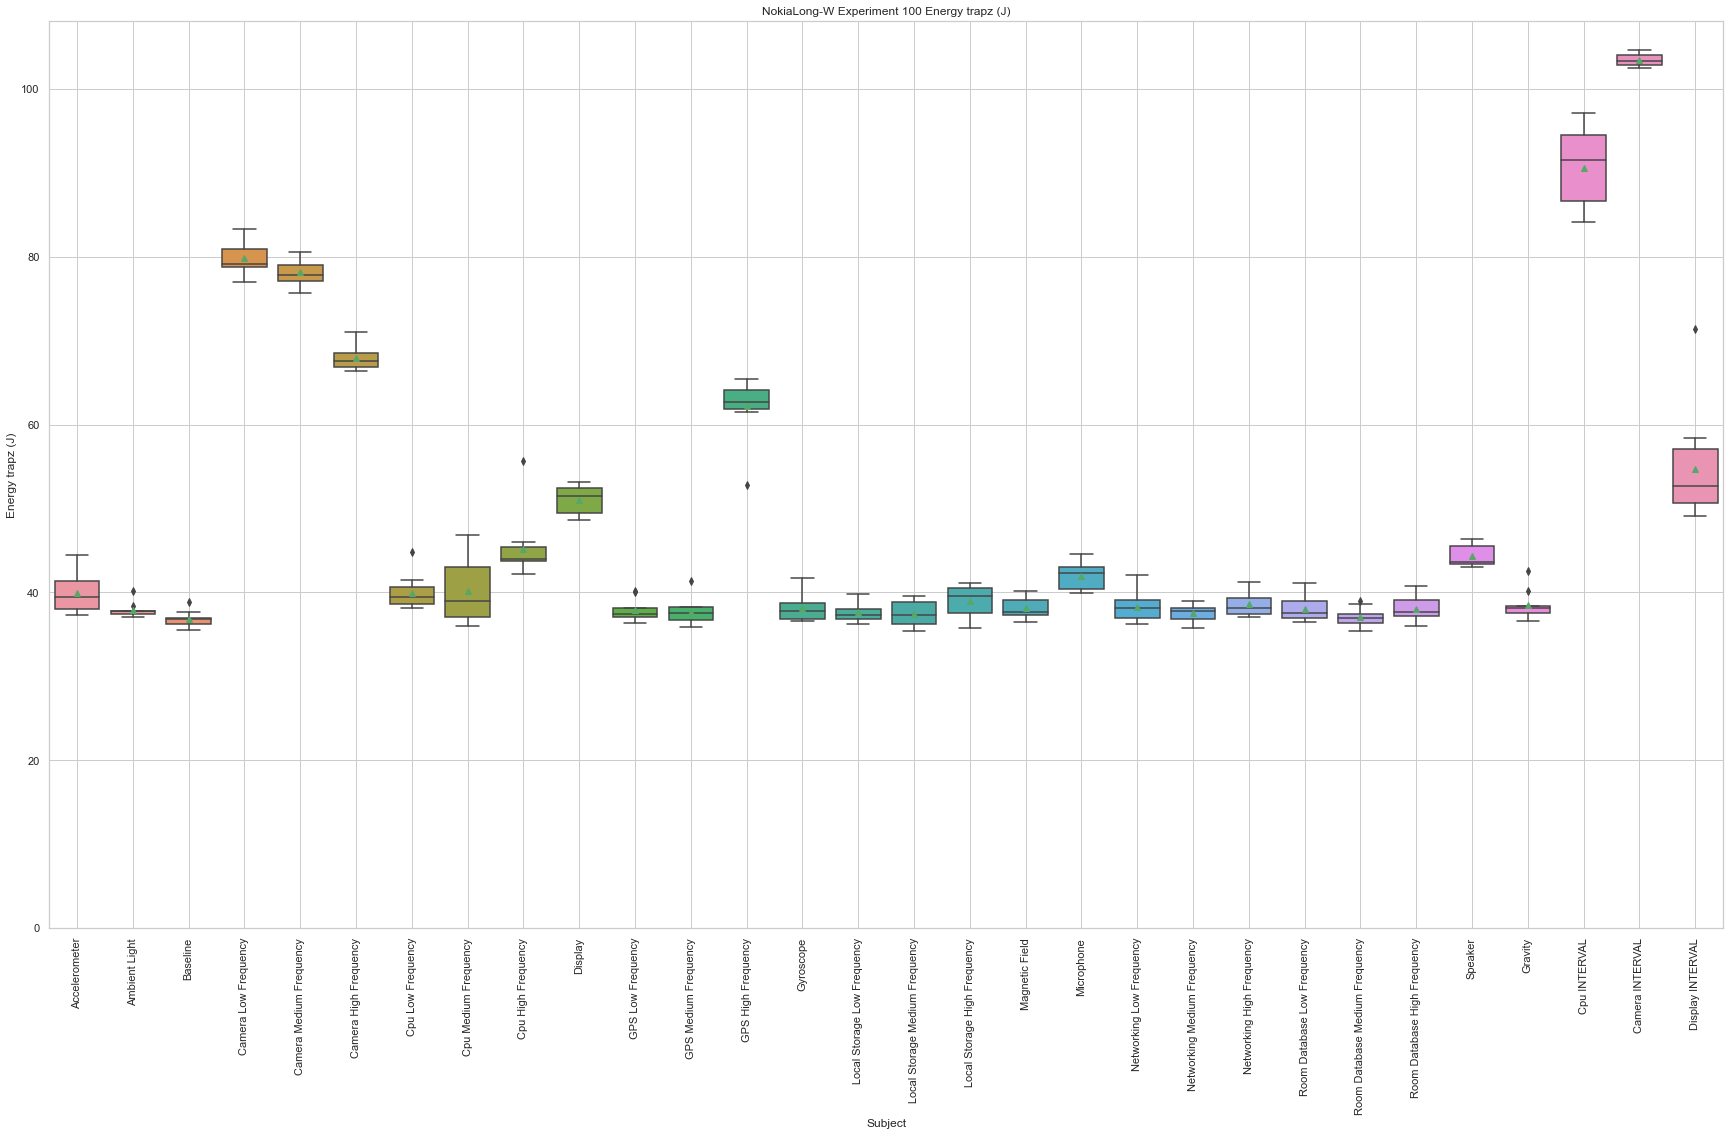

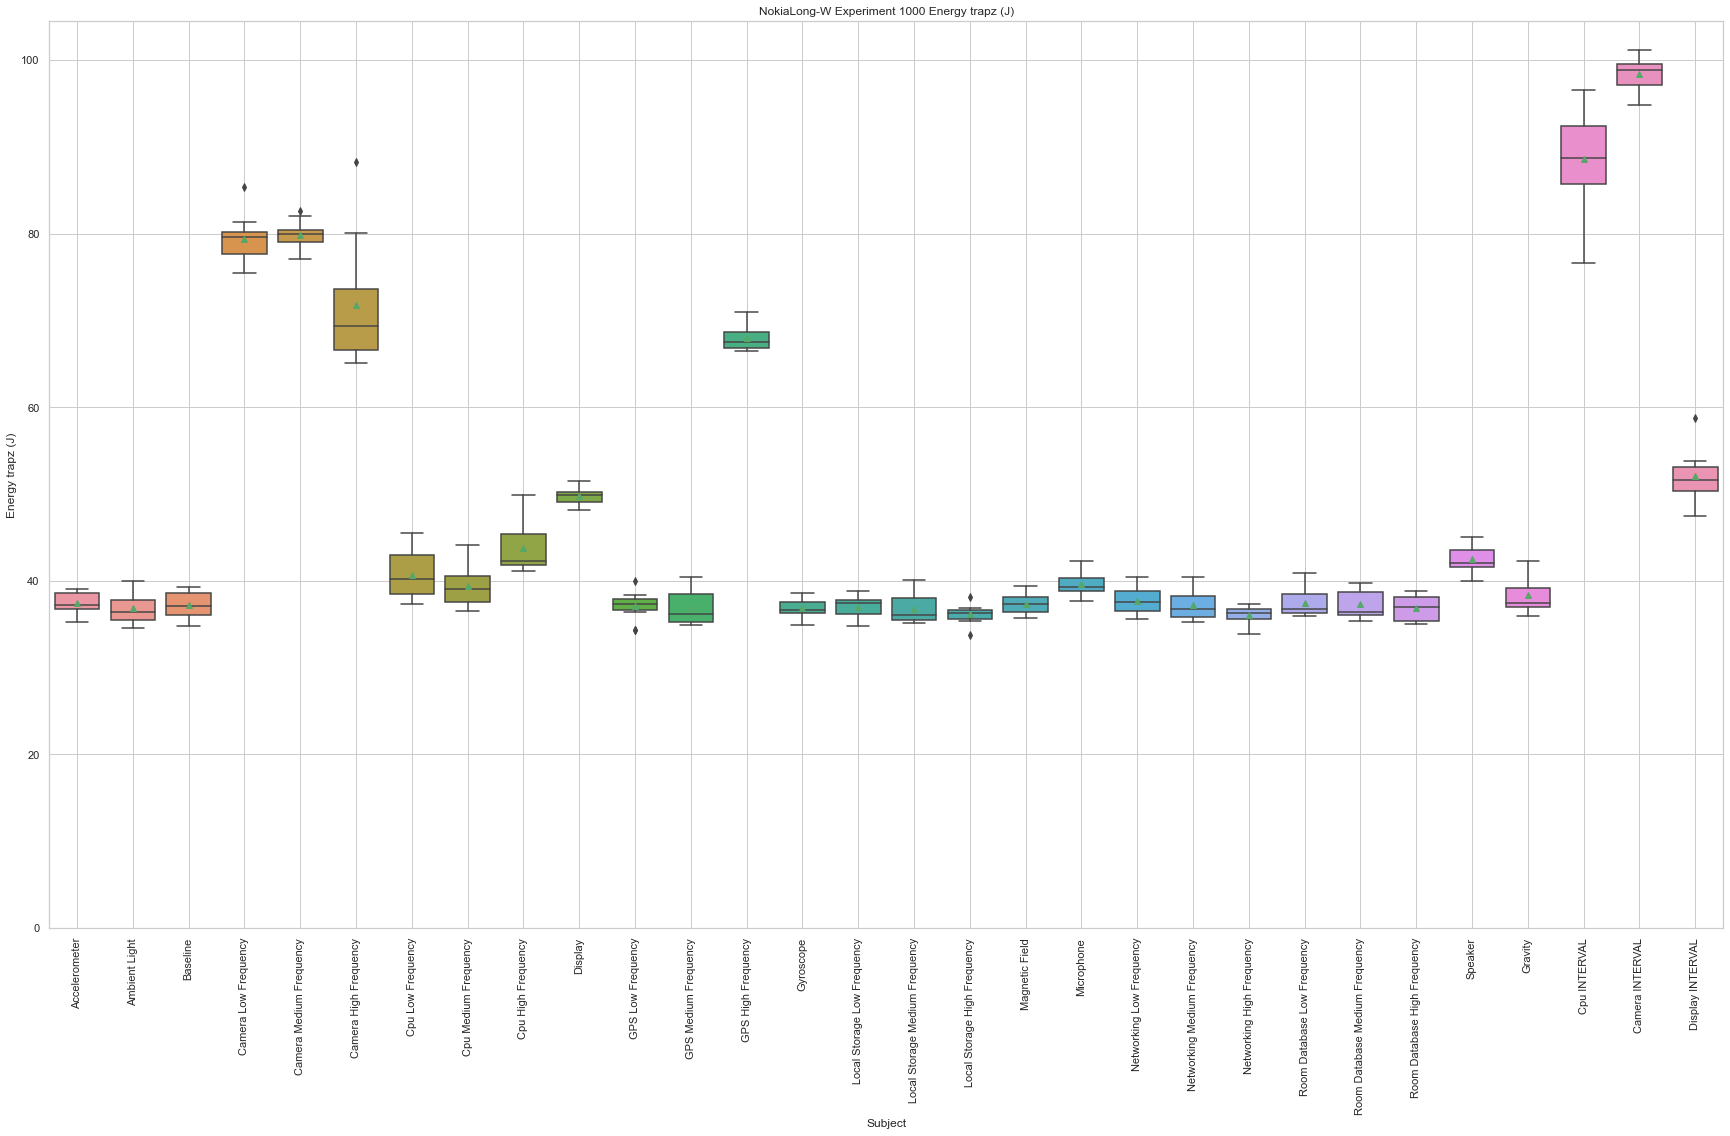

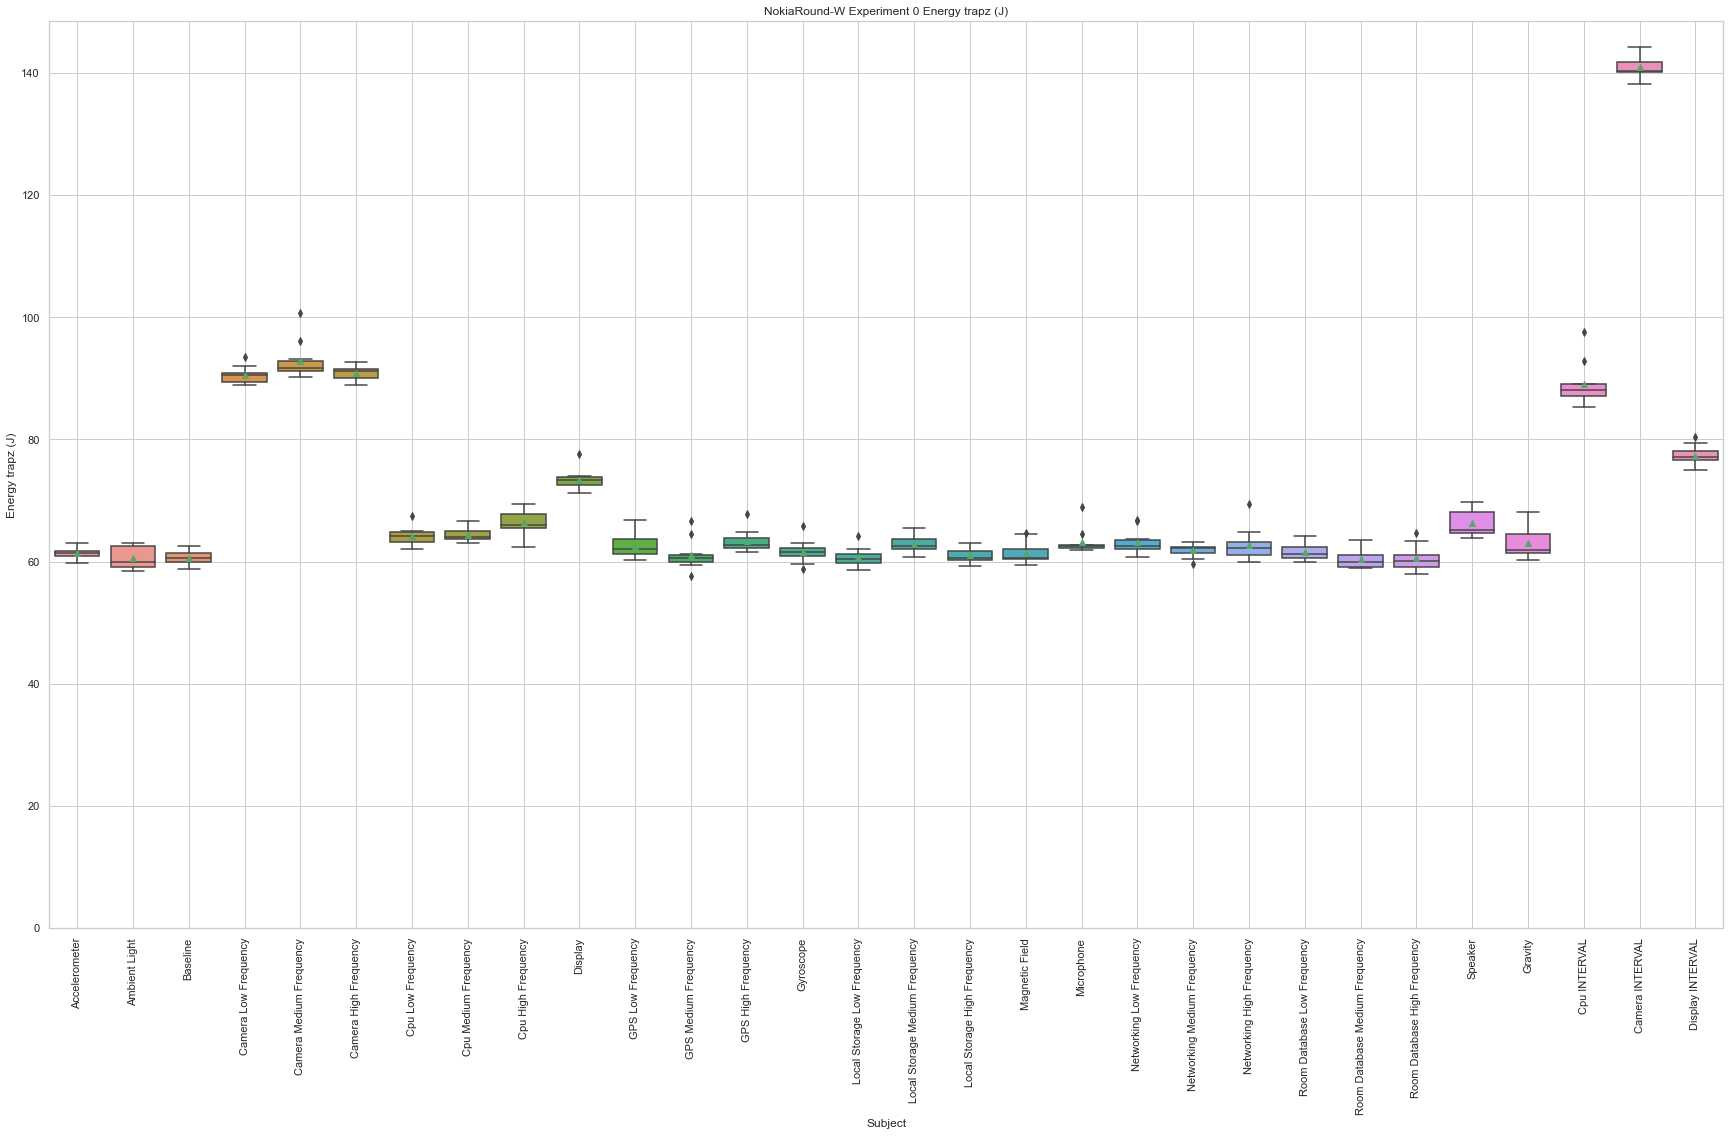

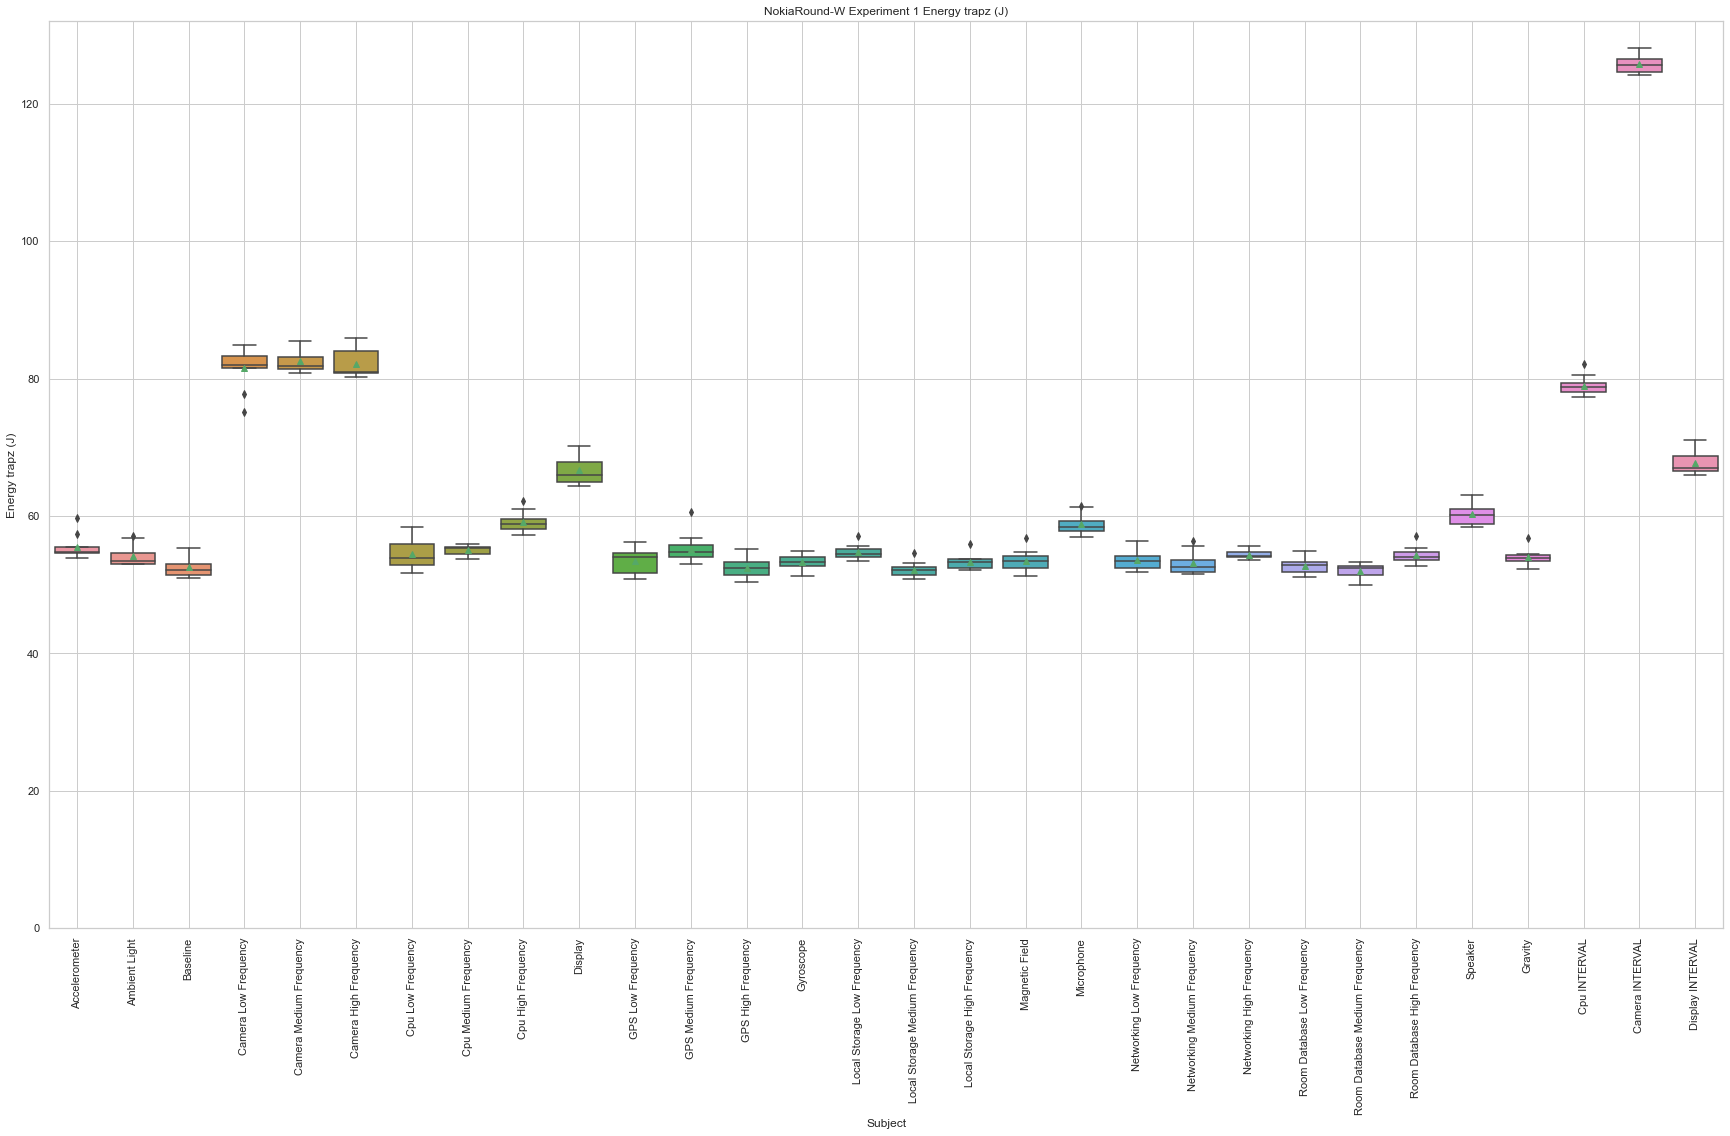

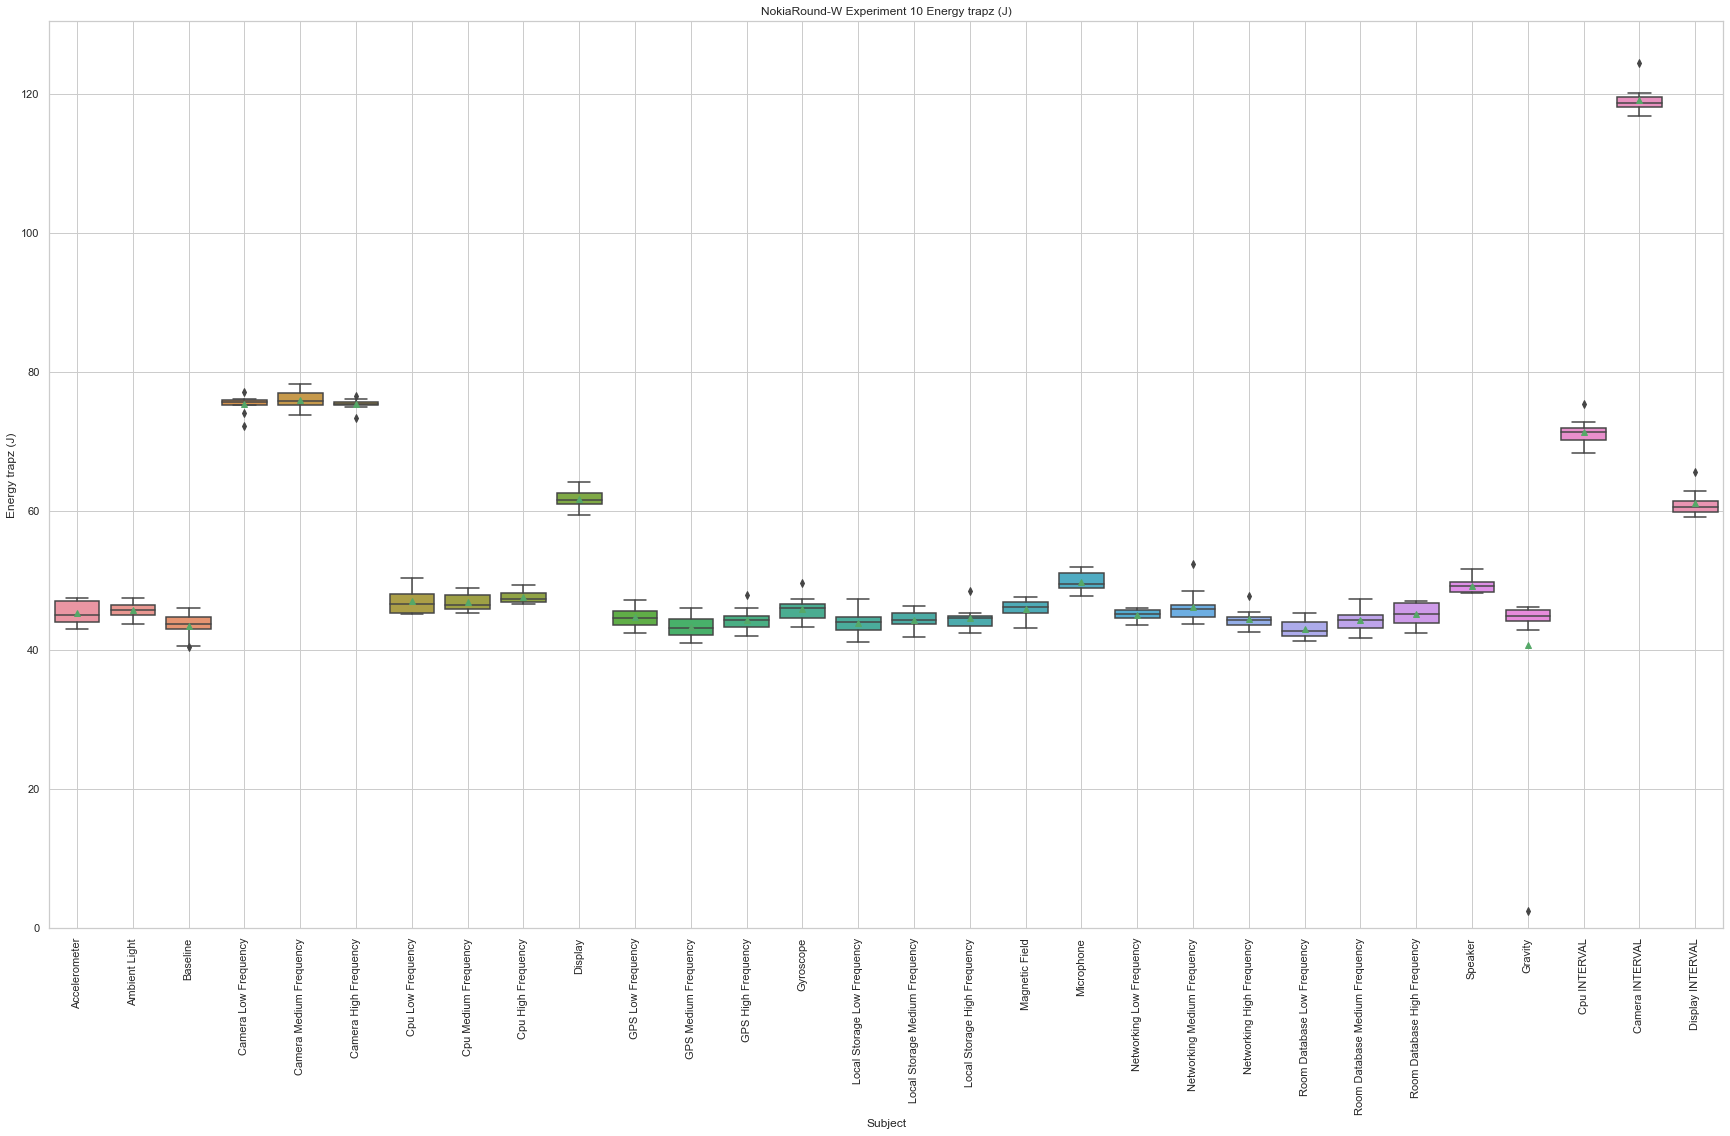

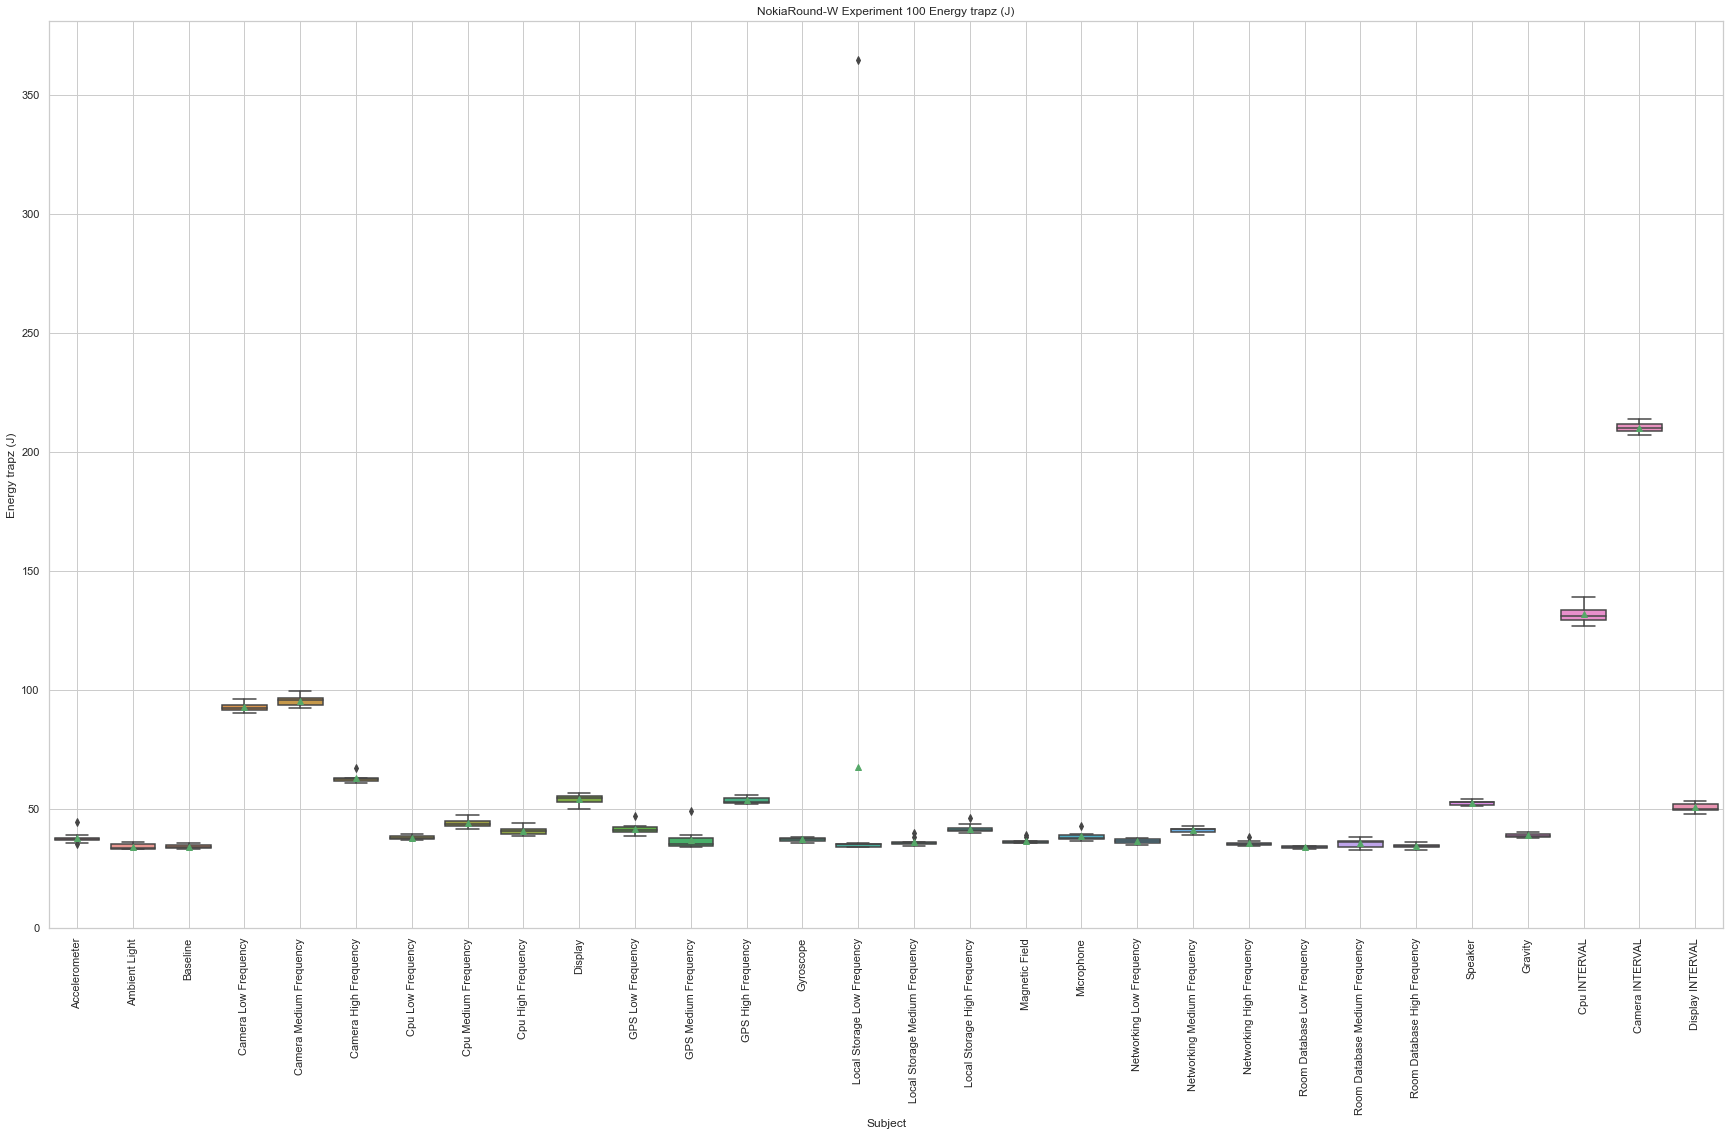

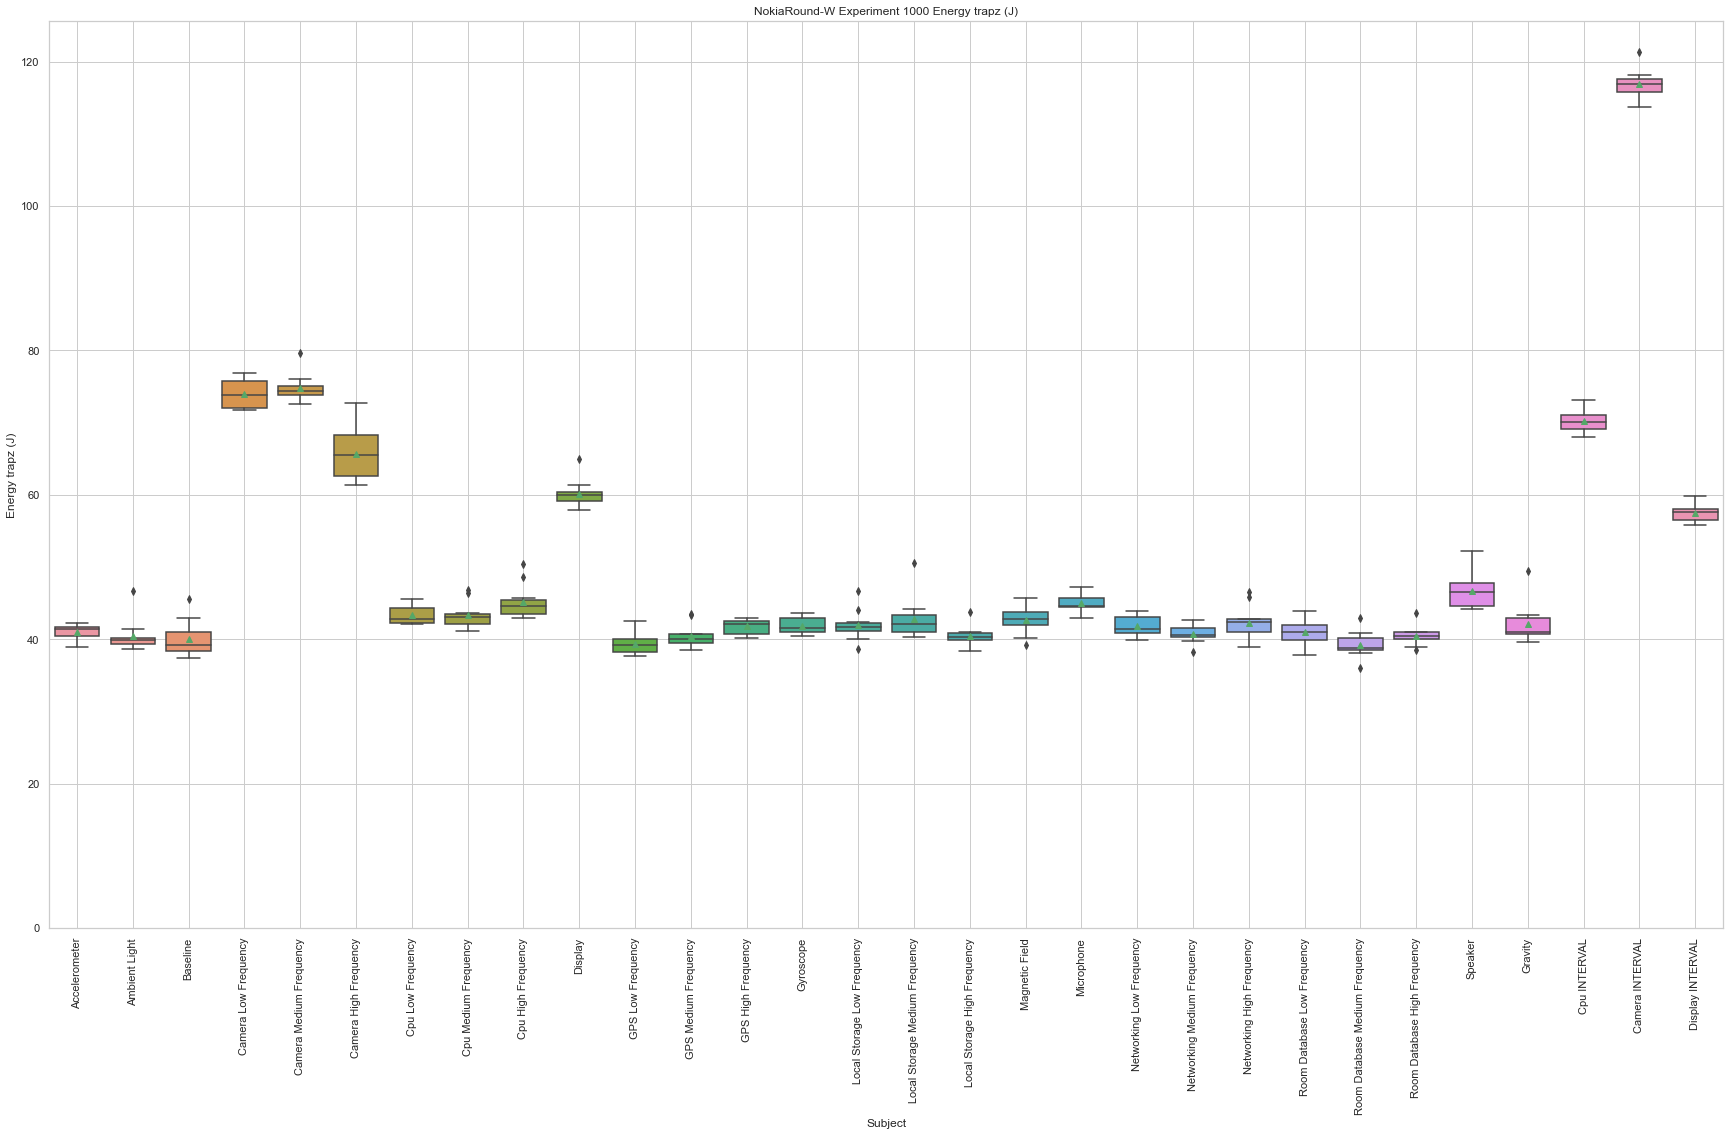

In [36]:
def get_aggregated_data(device, experiment, batch):
    path = os.path.join(data_path, device, f'Experiment{experiment}', batch, 'output')
    experiment_date = os.listdir(path)[-1]
    path = os.path.join(path, experiment_date, 'Aggregated_Results_Batterymanager.csv')
    # print(path)
    df = pd.read_csv(os.path.join(path))
    # replace 'e-www-httpsrequesttest' value in column with corresponding value from batch_dict
    subjects = df['subject'].unique()
    for subject in subjects:
        df['subject'] = df['subject'].replace(subject, batch_dict[batch][subject])
    return df

def concat_dataframes(device, experiment):
    df = pd.DataFrame()
    for batch in batch_dict:
        df = pd.concat([df, get_aggregated_data(device, experiment, batch)])
    return df

def plot_data(device, experiment, metric):
    df = concat_dataframes(device, experiment)
    plt.figure(figsize=(30, 20))
    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(x="subject", y=metric, data=df, showmeans=True, order=boxplot_order)

    plt.xticks(rotation = 90)
    plt.gcf().subplots_adjust(bottom=0.25)
    plt.grid(True)

    plt.ylim(0)
    plt.xlabel('Subject')
    plt.ylabel(metric)
    ax.set_title(f'{device} Experiment {experiment} {metric}')
    
    plt.savefig(f'out/boxplots/{device}_Experiment_{experiment}_{metric}.pdf', format="pdf")
    plt.show()

for device in devices:
    for experiment in experiments:
        if device == 'Pixel3-W' and experiment == 100: # the aggregation step for Pixel3-W Experiment 100 is missing :(
            continue
        plot_data(device, experiment, 'Energy trapz (J)')